# **AAPG WEEK 6**

**PROJECT 1 : WATER QUALITY ANALYSIS SOLUTION**

20th July 2024

**Facilitators:**

1. Promise Ekeh




# Data Description and Task Overview

## Data Description

This dataset contains measurements of various water quality parameters collected from different water sources over time. Below is a detailed description of each column in the dataset:

1. **Index**: Unique identifier for each data entry.
2. **pH**: The pH level of the water, indicating its acidity or alkalinity.
3. **Iron**: Concentration of iron in the water (in mg/L).
4. **Nitrate**: Concentration of nitrate in the water (in mg/L).
5. **Chloride**: Concentration of chloride in the water (in mg/L).
6. **Lead**: Concentration of lead in the water (in mg/L).
7. **Zinc**: Concentration of zinc in the water (in mg/L).
8. **Color**: The color of the water sample (e.g., Colorless, Faint Yellow).
9. **Turbidity**: The cloudiness or haziness of the water, measured in Nephelometric Turbidity Units (NTU).
10. **Fluoride**: Concentration of fluoride in the water (in mg/L).
11. **Copper**: Concentration of copper in the water (in mg/L).
12. **Odor**: Descriptive term for the odor of the water (e.g., odorless, faint odor).
13. **Sulfate**: Concentration of sulfate in the water (in mg/L).
14. **Conductivity**: The ability of the water to conduct electricity, measured in microsiemens per centimeter (µS/cm).
15. **Chlorine**: Concentration of chlorine in the water (in mg/L).
16. **Manganese**: Concentration of manganese in the water (in mg/L).
17. **Total Dissolved Solids (TDS)**: Total concentration of dissolved substances in the water (in mg/L).
18. **Source**: Source of the water sample (e.g., Lake, River, Ground).
19. **Water Temperature**: Temperature of the water at the time of measurement (in °C).
20. **Air Temperature**: Temperature of the air at the time of measurement (in °C).
21. **Month**: Month when the sample was taken.
22. **Day**: Day of the month when the sample was taken.
23. **Time of Day**: Time of day when the sample was taken (e.g., 0 for midnight, 12 for noon).
24. **Target**: Binary target variable indicating whether the water quality meets a certain standard (0 for meets standard, 1 for does not meet standard).


## Task for Participants

Participants are tasked with analyzing the water quality data to determine patterns, correlations, and insights that can help in understanding and managing water quality. Specific tasks include:

1. **Data Cleaning and Preprocessing**:
    - Handle missing or inconsistent data.
    - Convert categorical data into numerical format if necessary.
    - Normalize or standardize numerical features.

2. **Exploratory Data Analysis (EDA)**:
    - Generate summary statistics for each feature.
    - Visualize data distributions and relationships between variables using plots (e.g., histograms, scatter plots, box plots).
    - Identify any trends or anomalies in the data.

3. **Feature Engineering**:
    - Create new features that might be useful for prediction, such as interaction terms or aggregates.
    - Evaluate the importance of different features for predicting water quality.

4. **Model Building**:
    - Split the data into training and testing sets.
    - Train machine learning models to predict the target variable (water quality standard).
    - Evaluate model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

5. **Model Interpretation and Insights**:
    - Interpret the model to understand which factors most influence water quality.
    - Provide actionable insights based on model findings.
    - Discuss potential interventions or policy recommendations to improve water quality.

# **Data Access**

Download the subset `water_quality_dataset_100k_new.csv` dataset from the google drive

https://drive.google.com/file/d/1NPnyvMMa4EgRMpCWd1LOOVGeOOmtcC6f/view?usp=drive_link


`Original dataset` https://www.kaggle.com/datasets/mitanshuchakrawarty/water-quality-prediction/data?select=dataset.csv

## **Import Neccessary Libraries**

In [4]:
# ! pip install seaborn

In [5]:
# ! pip install tqdm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from xgboost import XGBClassifier


## **Read Data**
![](image/data_snapshot.png)

In [3]:
# write your code
data= pd.read_csv('data/water_quality_dataset_100k_new.csv')
data = data.drop(columns= "Index")
df=data.copy()

df.head()

pH      Iron   Nitrate    Chloride           Lead      Zinc  \
0  7.262136  0.002857  5.965704  245.101184   6.679537e-44  0.702867   
1  6.827967  0.000356  8.650092  261.948686  2.751868e-159  0.205934   
2       NaN  0.000063       NaN  176.192348            NaN  0.896104   
3  7.782600  0.051721  3.747001  224.053938  1.513023e-136  0.088500   
4  7.627800  0.000172  7.988966   89.478315   3.450032e-76  0.402281   

            Color  Turbidity  Fluoride    Copper  ...  Chlorine     Manganese  \
0    Faint Yellow   0.014223  0.583591  0.039819  ...  2.835370  8.067879e-03   
1       Colorless   0.339881  2.214786  0.224705  ...  3.228036  4.245956e-05   
2  Near Colorless   0.122076  1.566183  0.058934  ...  2.863932  1.646600e-03   
3       Colorless   0.209460  0.693032  0.393710  ...  4.195383  5.283502e-11   
4       Colorless   0.520102  1.130603  0.211742  ...  4.004640  9.799640e-03   

   Total Dissolved Solids     Source  Water Temperature  Air Temperature  \
0              153.126744     Spring          11.179752        55.340114   
1              260.391845     Ground          12.573723        80.335206   
2              131.984171  Reservoir          12.702576        81.535521   
3              447.051626        NaN          13.009862        72.845282   
4              395.187898     Ground          17.727374        36.844691   

      Month   Day  Time of Day Target  
0    August  20.0         17.0      0  
1      June  26.0          2.0      1  
2   January   4.0         16.0      0  
3       May  13.0          1.0      0  
4  December  25.0         18.0      0  

[5 rows x 23 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      97979 non-null   float64
 1   Iron                    99328 non-null   float64
 2   Nitrate                 98204 non-null   float64
 3   Chloride                97045 non-null   float64
 4   Lead                    99571 non-null   float64
 5   Zinc                    97439 non-null   float64
 6   Color                   99901 non-null   object 
 7   Turbidity               99167 non-null   float64
 8   Fluoride                96784 non-null   float64
 9   Copper                  96785 non-null   float64
 10  Odor                    97034 non-null   float64
 11  Sulfate                 96723 non-null   float64
 12  Conductivity            97215 non-null   float64
 13  Chlorine                98992 non-null   float64
 14  Manganese            

In [4]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


pH          Iron       Nitrate      Chloride           Lead  \
count  97979.000000  9.932800e+04  98204.000000  97045.000000   9.957100e+04   
mean       7.450048  1.275435e-01      6.154743    184.254852   1.759505e-03   
std        0.891517  4.743079e-01      3.236141     68.306315   3.751641e-02   
min        2.353677  9.298435e-39      0.587550     29.413497   0.000000e+00   
25%        6.897409  9.697968e-06      3.953114    138.199592  3.575708e-122   
50%        7.459988  2.275870e-03      5.593961    175.790181   2.963497e-62   
75%        8.018791  5.499786e-02      7.655207    218.162046   4.659272e-27   
max       12.392381  1.322768e+01     51.613366    993.933248   4.656781e+00   

               Zinc     Turbidity      Fluoride        Copper          Odor  \
count  9.743900e+04  9.916700e+04  96784.000000  9.678500e+04  97034.000000   
mean   1.553338e+00  5.151431e-01      0.963694  5.157433e-01      1.806235   
std    1.546706e+00  9.105212e-01      0.818756  5.914996e-01      1.069706   
min    1.270699e-07  3.119116e-13      0.000072  5.313946e-07      0.011100   
25%    4.176054e-01  3.848924e-02      0.377357  1.301375e-01      0.893771   
50%    1.082226e+00  2.081580e-01      0.778309  3.481229e-01      1.779163   
75%    2.236318e+00  6.226299e-01      1.338076  6.998091e-01      2.658366   
max    1.904981e+01  1.733592e+01     12.988166  8.133315e+00      4.141967   

            Sulfate  Conductivity      Chlorine     Manganese  \
count  96723.000000  97215.000000  98992.000000  9.817000e+04   
mean     146.012257    425.602265      3.251744  1.067892e-01   
std       68.289200    190.475063      0.731622  4.669622e-01   
min       14.762419     28.615895      1.085141  5.156055e-39   
25%       98.082144    286.397011      2.741320  2.405061e-06   
50%      134.733706    398.014431      3.207097  6.345394e-04   
75%      181.821092    533.384862      3.703591  1.631163e-02   
max     1236.343971   1958.124307     10.425895  1.421583e+01   

       Total Dissolved Solids  Water Temperature  Air Temperature  \
count            99961.000000       97190.000000     99521.000000   
mean               267.386161          19.161161        60.019117   
std                155.972565          11.382027        18.107604   
min                  0.013253           1.692632       -19.940412   
25%                132.897849          11.365014        47.840514   
50%                266.045828          16.466972        59.983640   
75%                398.800312          23.921549        72.132507   
max                579.793550         165.919987       137.532364   

                Day   Time of Day         Target  
count  98309.000000  98064.000000  100000.000000  
mean      15.723321     11.513461       0.303060  
std        8.800908      6.921008       0.459583  
min        1.000000      0.000000       0.000000  
25%        8.000000      6.000000       0.000000  
50%       16.000000     12.000000       0.000000  
75%       23.000000     18.000000       1.000000  
max       31.000000     23.000000       1.000000

In [5]:
df['Target'].value_counts()

Target
0    69694
1    30306
Name: count, dtype: int64

# Visualisation

## Pie chart

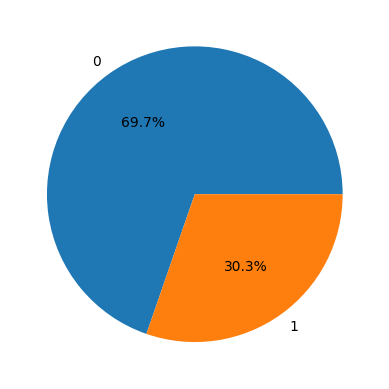

In [11]:
target_count=df['Target'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.show()

In [6]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove("Target")
numerical_features


['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Lead',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature',
 'Day',
 'Time of Day']

In [7]:
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

categorical_features

['Color', 'Source', 'Month']

## Histogram

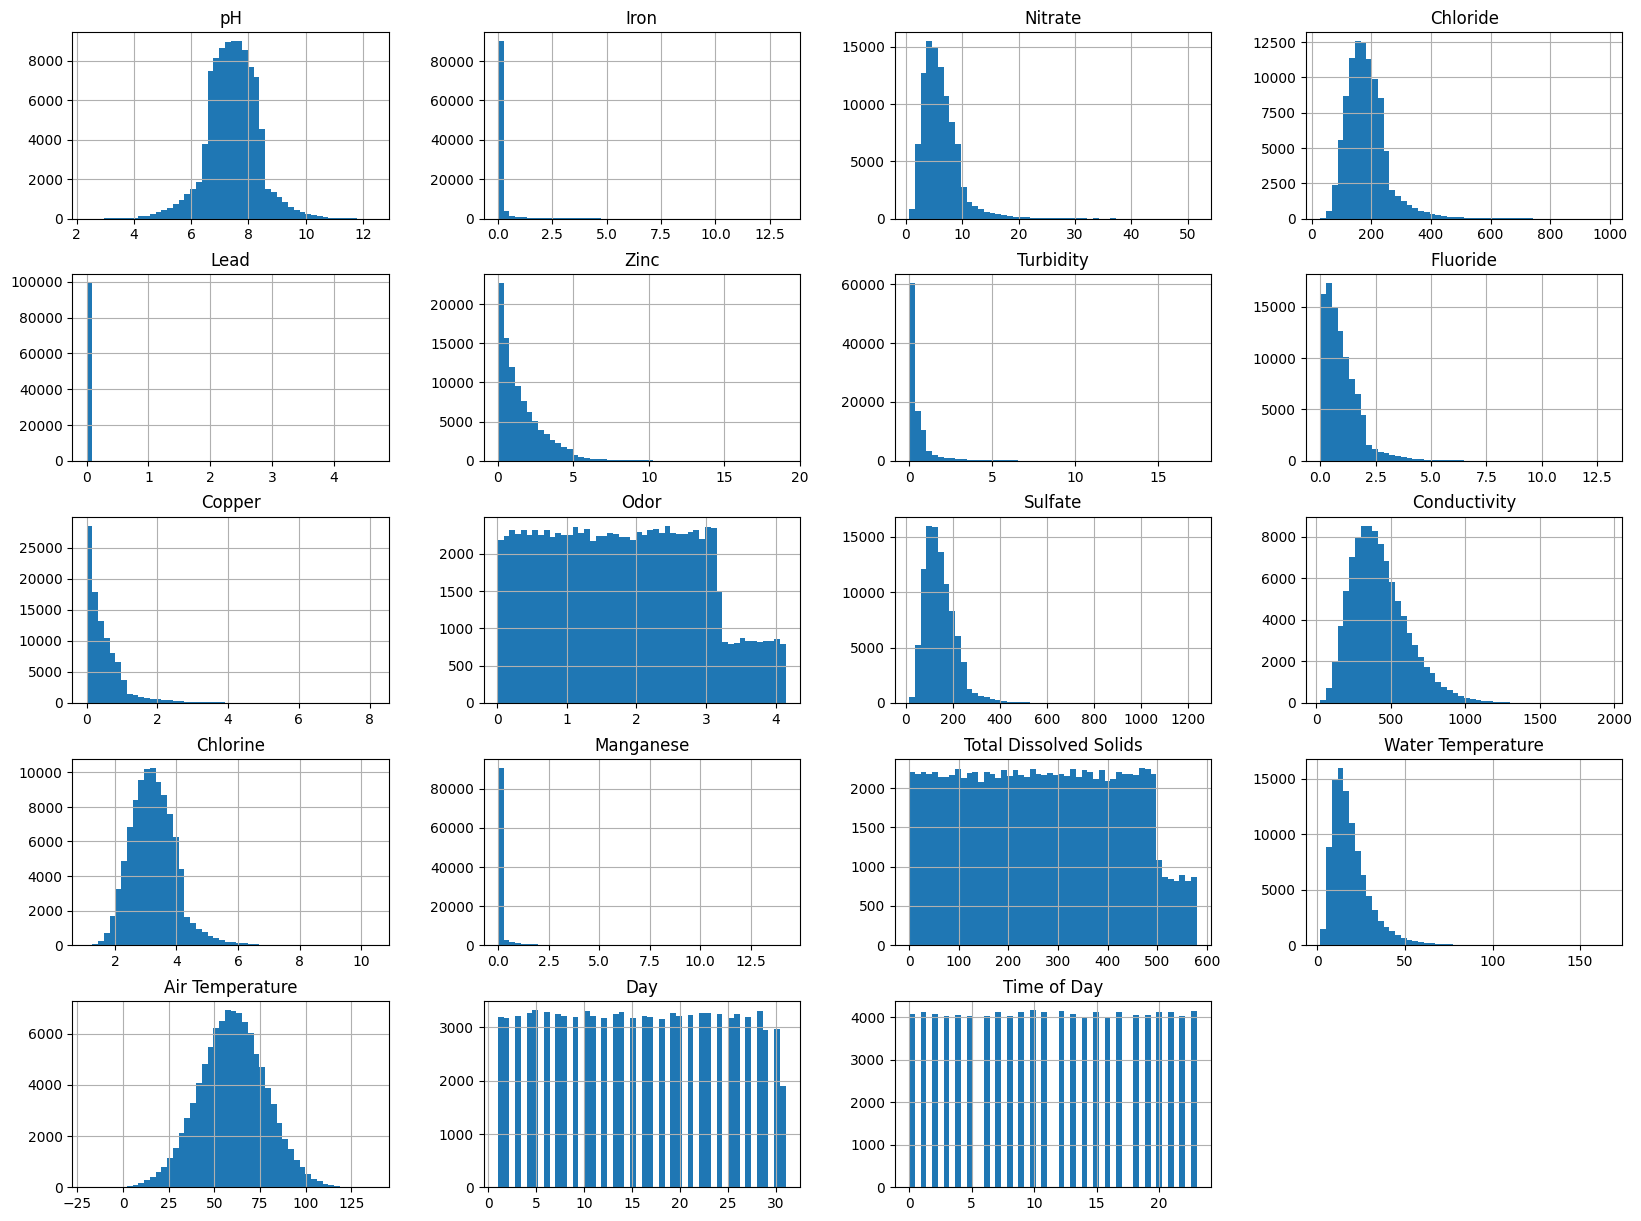

In [8]:
# Write your code
# Plot histograms for numerical features
df[numerical_features].hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:

# Initial visualization of distributions and relationships
print("\nPairplot of Numerical Features and Target:")
# sns.pairplot(df[numerical_features + ['Target']], diag_kind='kde', hue='Target')
# plt.show()



Pairplot of Numerical Features and Target:


## Box Plot


Boxplots of Numerical Features:


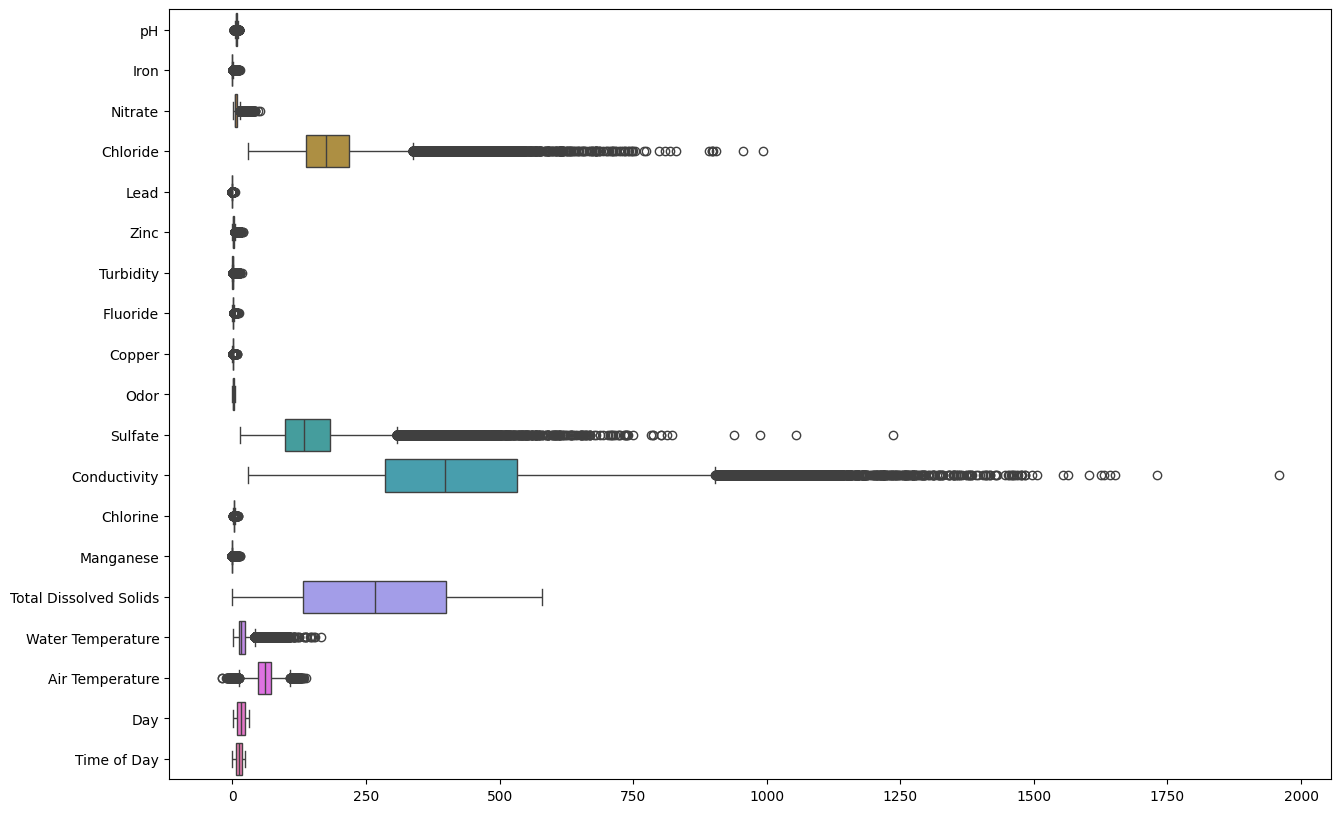

In [9]:
print("\nBoxplots of Numerical Features:")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_features], orient='h')
plt.show()

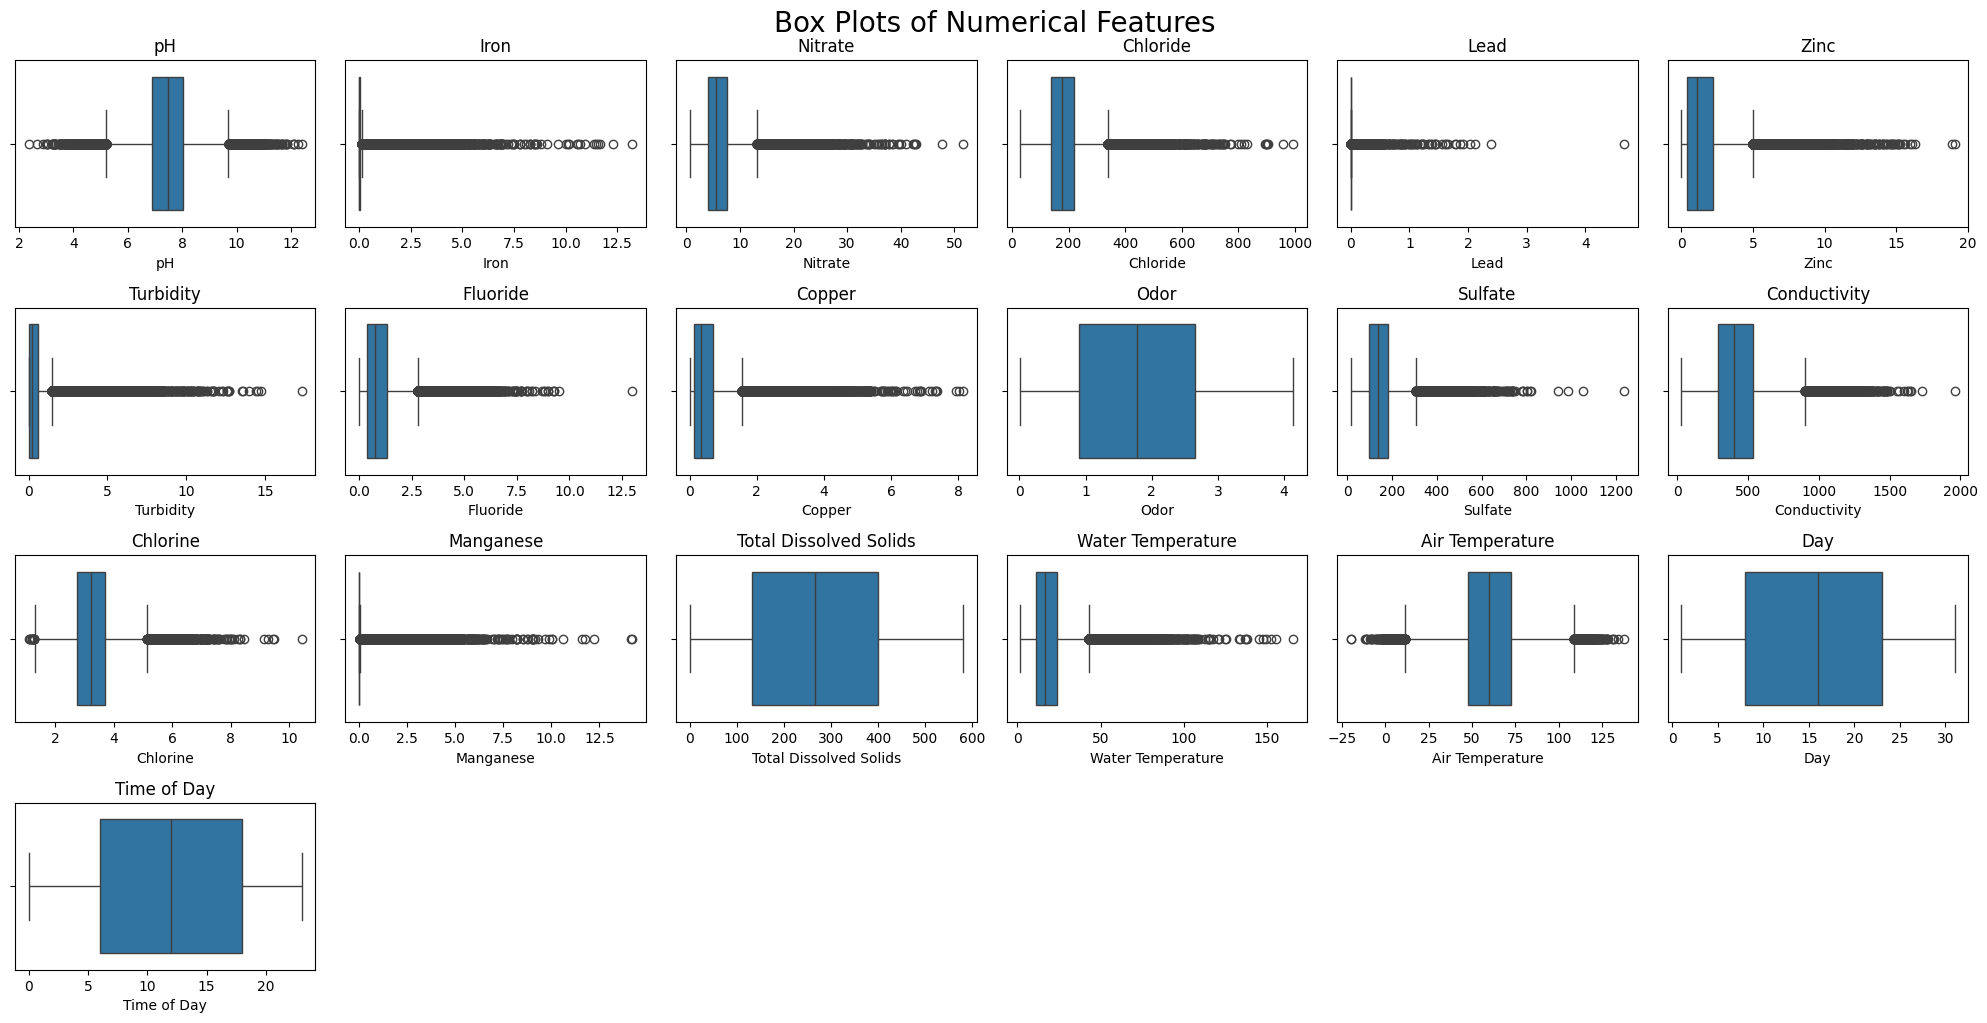

In [17]:
# Plot box plots for numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(df[numerical_features], 1):
    plt.subplot(6, 6, i)
    sns.boxplot(data=df[numerical_features], x=column)
    plt.title(column)

plt.suptitle('Box Plots of Numerical Features', fontsize=20)
plt.tight_layout()
plt.show()

## Categorical Plots


Count plots of Categorical Features:


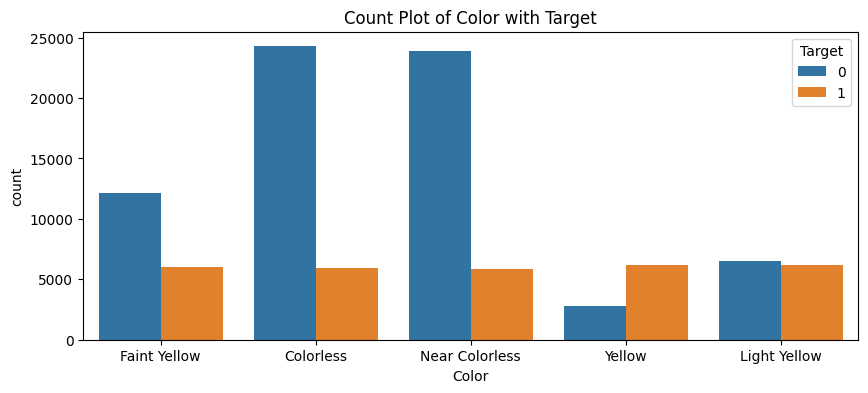

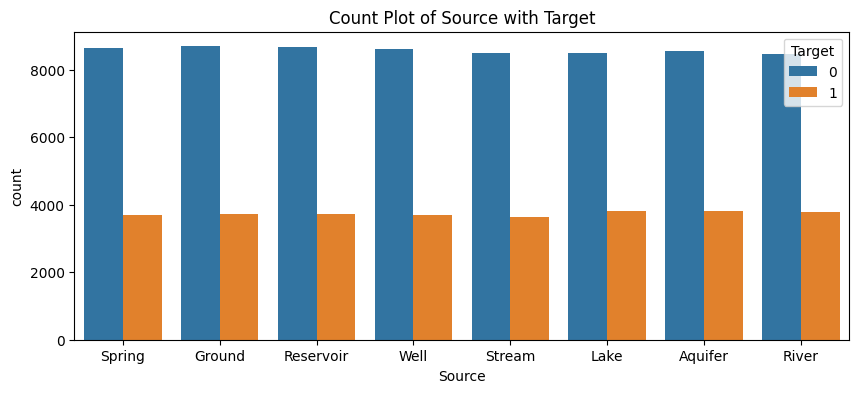

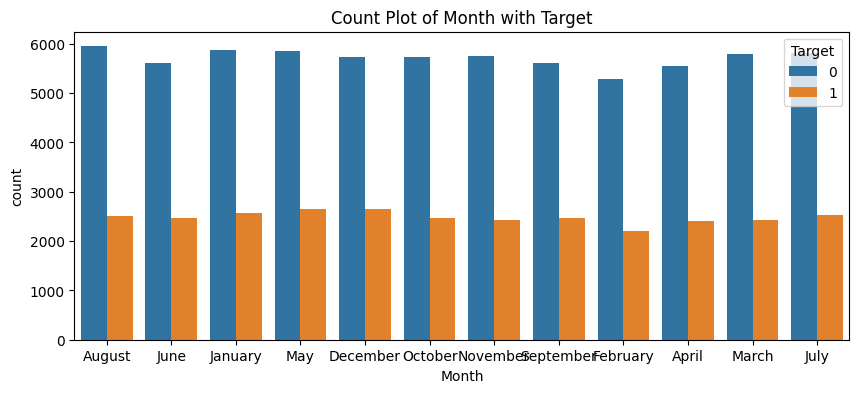

In [18]:
print("\nCount plots of Categorical Features:")
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=feature, hue='Target')
    plt.title(f'Count Plot of {feature} with Target')
    plt.show()

## Scatter

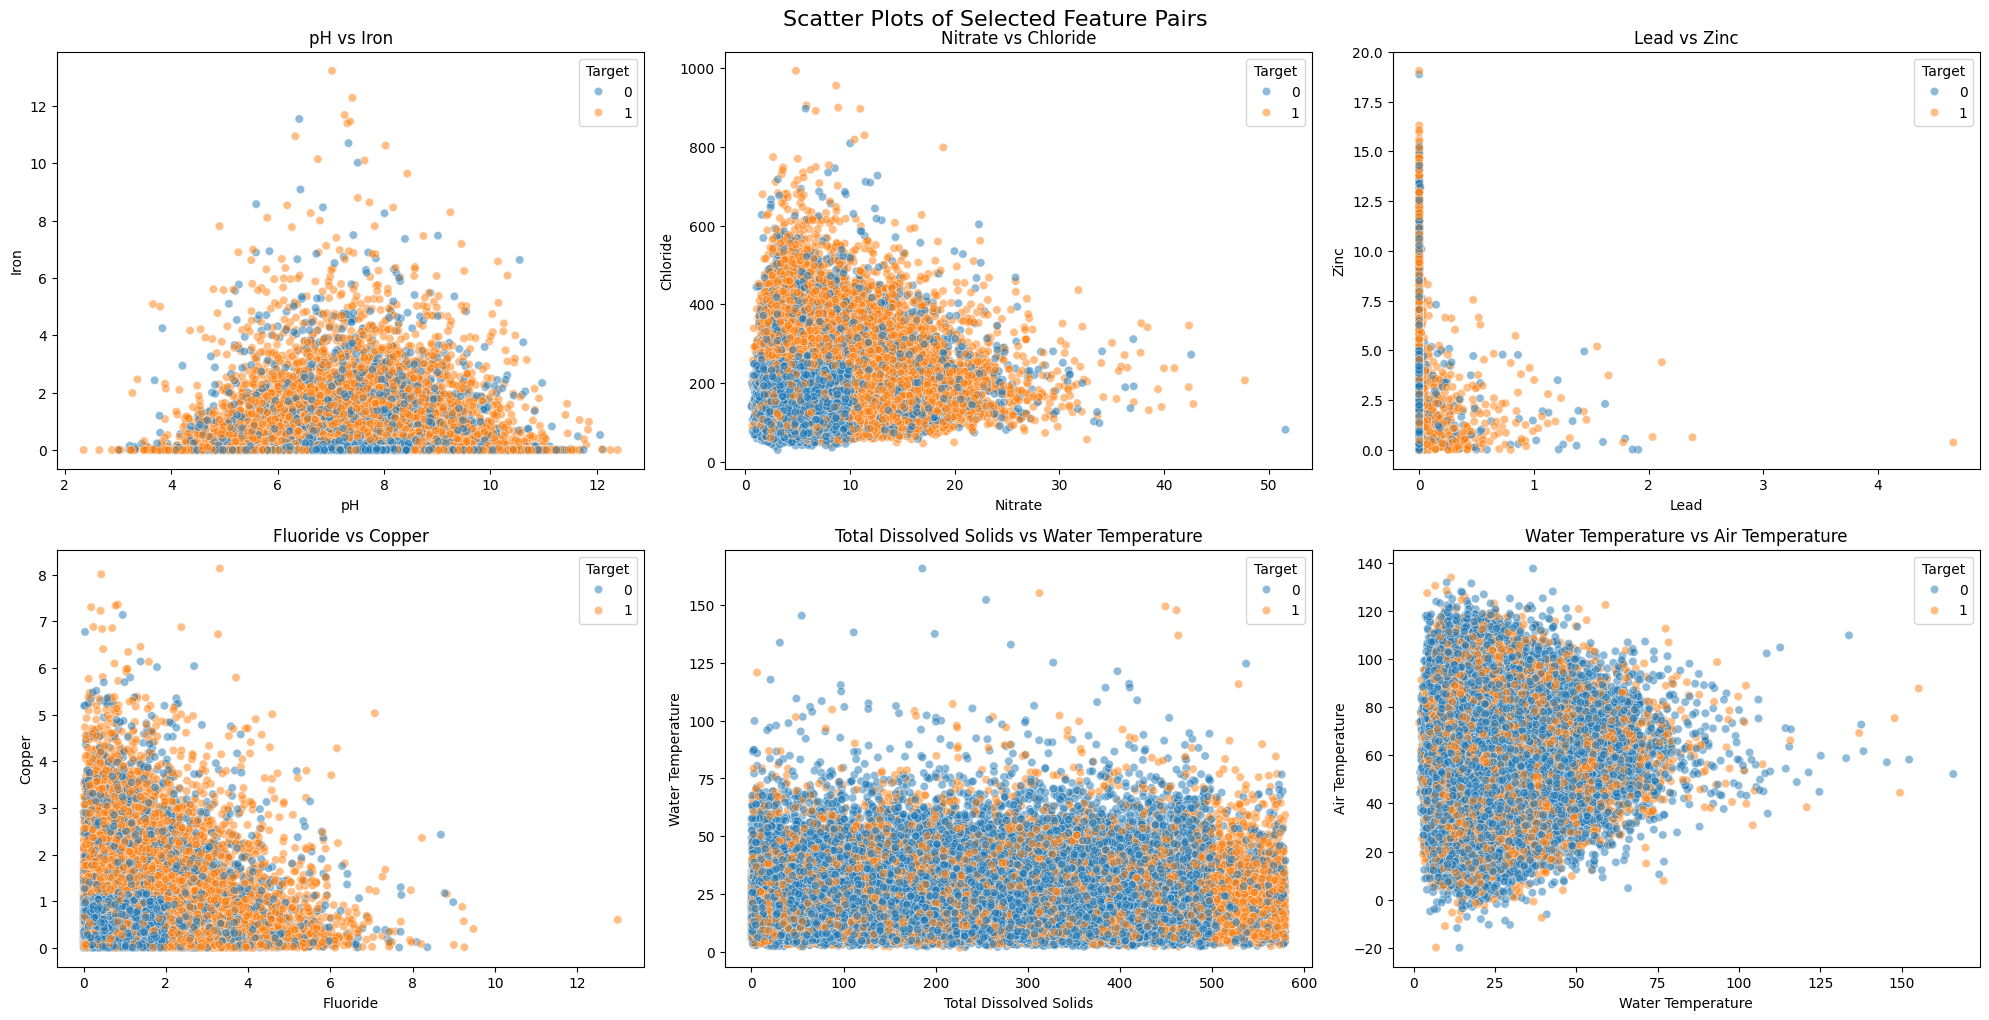

In [19]:
# Plot scatter plots for pairs of numerical features
plt.figure(figsize=(20, 15))

# Example pairs of numerical features
pairs = [('pH', 'Iron'), ('Nitrate', 'Chloride'), ('Lead', 'Zinc'), ('Fluoride', 'Copper'), 
         ('Total Dissolved Solids', 'Water Temperature'), ('Water Temperature', 'Air Temperature'),
         ]

for i, (x_feature, y_feature) in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=x_feature, y=y_feature, data=df, alpha=0.5, hue='Target')

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'{x_feature} vs {y_feature}')
    

plt.suptitle('Scatter Plots of Selected Feature Pairs', fontsize=16)
plt.tight_layout()

plt.show()



Correlation Matrix of Numerical Features:


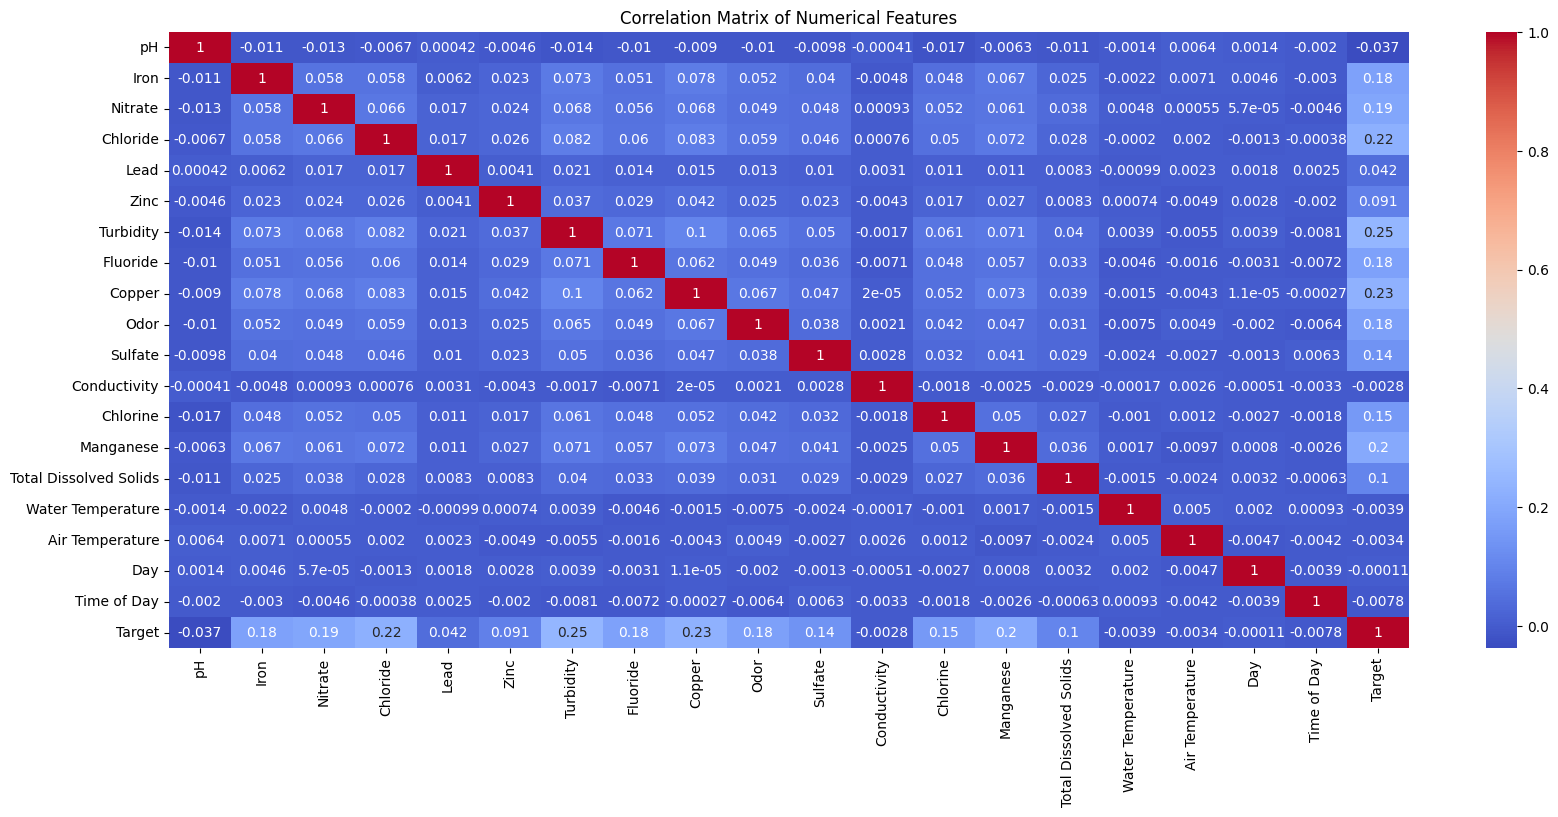

In [10]:
print("\nCorrelation Matrix of Numerical Features:")
plt.figure(figsize=(20, 8))
corr_matrix = df[numerical_features + ["Target"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **Task 1: Data Cleaning and Preprocessing**


## Step 1: Handle Missing or Inconsistent Data

1. **Identify Missing Values:**
   - Detect missing values in the dataset.


In [11]:
df.isna().sum()

pH                        2021
Iron                       672
Nitrate                   1796
Chloride                  2955
Lead                       429
Zinc                      2561
Color                       99
Turbidity                  833
Fluoride                  3216
Copper                    3215
Odor                      2966
Sulfate                   3277
Conductivity              2785
Chlorine                  1008
Manganese                 1830
Total Dissolved Solids      39
Source                    1529
Water Temperature         2810
Air Temperature            479
Month                     1623
Day                       1691
Time of Day               1936
Target                       0
dtype: int64

In [12]:
df.shape

(100000, 23)

missing value per rows

In [13]:
missing=df.isna().sum(axis=1)/df.shape[1] *100

In [24]:
missing.value_counts()

0.000000     66901
4.347826     27159
8.695652      5264
13.043478      623
17.391304       51
21.739130        2
Name: count, dtype: int64

In [14]:
df.dropna()

pH          Iron    Nitrate    Chloride           Lead      Zinc  \
0      7.262136  2.857248e-03   5.965704  245.101184   6.679537e-44  0.702867   
1      6.827967  3.555528e-04   8.650092  261.948686  2.751868e-159  0.205934   
4      7.627800  1.721911e-04   7.988966   89.478315   3.450032e-76  0.402281   
5      7.438374  1.023030e-01   6.891186  157.967041   1.198280e-42  0.185183   
6      7.945263  1.616232e-01   3.082807  191.561335   7.278161e-05  1.808817   
...         ...           ...        ...         ...            ...       ...   
99994  6.463093  6.854987e-04   3.980943  301.672995  5.272680e-317  1.355574   
99995  6.878051  4.117124e-07   5.322810  108.110638  8.696207e-159  3.182844   
99996  6.234022  1.117469e-01  17.328060  419.511947  3.996521e-146  0.279021   
99997  7.861995  3.820164e-05   4.304552  215.233572  2.909526e-124  0.009500   
99999  8.590040  3.168677e-04   4.373577  196.374090   2.664295e-03  0.483866   

                Color  Turbidity  Fluoride    Copper  ...  Chlorine  \
0        Faint Yellow   0.014223  0.583591  0.039819  ...  2.835370   
1           Colorless   0.339881  2.214786  0.224705  ...  3.228036   
4           Colorless   0.520102  1.130603  0.211742  ...  4.004640   
5              Yellow   0.000966  1.143355  1.195115  ...  4.520820   
6           Colorless   0.263444  1.765077  0.405573  ...  3.615394   
...               ...        ...       ...       ...  ...       ...   
99994       Colorless   0.695195  2.287507  0.314559  ...  4.140258   
99995       Colorless   0.278222  1.282346  0.759200  ...  3.844900   
99996          Yellow   0.152766  1.119400  1.501363  ...  2.896578   
99997  Near Colorless   0.027866  0.093040  0.277302  ...  2.131950   
99999  Near Colorless   1.262112  0.943935  0.272855  ...  3.838088   

          Manganese  Total Dissolved Solids     Source  Water Temperature  \
0      8.067879e-03              153.126744     Spring          11.179752   
1      4.245956e-05              260.391845     Ground          12.573723   
4      9.799640e-03              395.187898     Ground          17.727374   
5      2.810500e-02              217.500492       Well           6.706531   
6      6.839616e-11              104.196529  Reservoir           9.201807   
...             ...                     ...        ...                ...   
99994  3.315744e-04              477.095920       Lake          15.928996   
99995  3.612888e-03              490.345588       Lake           9.796617   
99996  3.589283e-03              355.272379       Well          15.855275   
99997  1.754100e-03              337.180755      River          37.648185   
99999  2.872968e-01              164.660271  Reservoir          12.657137   

       Air Temperature     Month   Day  Time of Day Target  
0            55.340114    August  20.0         17.0      0  
1            80.335206      June  26.0          2.0      1  
4            36.844691  December  25.0         18.0      0  
5            53.995611    August  20.0         10.0      1  
6            33.332203   October  22.0         23.0      0  
...                ...       ...   ...          ...    ...  
99994        31.335848    August  22.0          3.0      1  
99995        38.218949       May  21.0          7.0      0  
99996        63.903902     March  18.0         12.0      0  
99997        72.763230       May  15.0         12.0      0  
99999        63.647430  November  12.0         19.0      1  

[66901 rows x 23 columns]

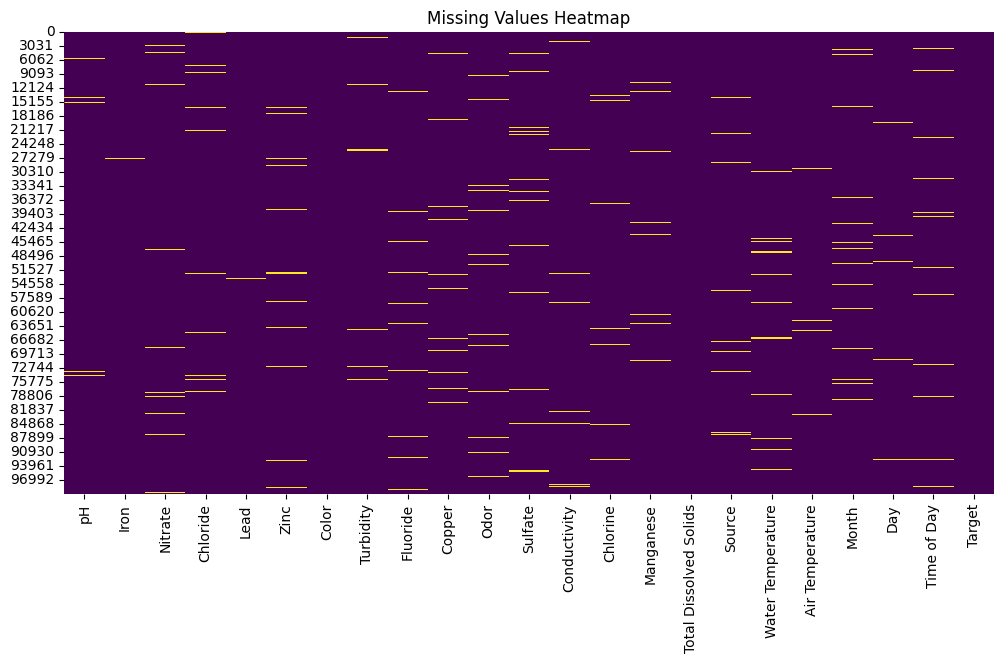

Missing Values Count:
 pH                        2021
Iron                       672
Nitrate                   1796
Chloride                  2955
Lead                       429
Zinc                      2561
Color                       99
Turbidity                  833
Fluoride                  3216
Copper                    3215
Odor                      2966
Sulfate                   3277
Conductivity              2785
Chlorine                  1008
Manganese                 1830
Total Dissolved Solids      39
Source                    1529
Water Temperature         2810
Air Temperature            479
Month                     1623
Day                       1691
Time of Day               1936
dtype: int64


In [25]:
# Detect missing values
missing_values = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Display missing values count
missing_values = missing_values[missing_values > 0]
print("Missing Values Count:\n", missing_values)


2. **Impute or Remove Missing Values:**
   - For numerical features, you can impute missing values using mean, median, or mode.
   - For categorical features, you can impute missing values using the most frequent category or a placeholder such as 'Unknown'.
   - Alternatively, remove rows with missing values if they are few and do not significantly impact the dataset.


Based on the percentage of missing values, we can decide on the following strategies:

- if a column has a very high percentage of missing values, it might be best to drop it.
- For numerical columns with moderate missing values, we can fill them with the mean or median.
- For categorical columns with missing values, we can fill them with the mode.

In [26]:
df.isna().sum().sort_values()

Target                       0
Total Dissolved Solids      39
Color                       99
Lead                       429
Air Temperature            479
Iron                       672
Turbidity                  833
Chlorine                  1008
Source                    1529
Month                     1623
Day                       1691
Nitrate                   1796
Manganese                 1830
Time of Day               1936
pH                        2021
Zinc                      2561
Conductivity              2785
Water Temperature         2810
Chloride                  2955
Odor                      2966
Copper                    3215
Fluoride                  3216
Sulfate                   3277
dtype: int64

In [27]:
df.dropna()

pH          Iron    Nitrate    Chloride           Lead      Zinc  \
0      7.262136  2.857248e-03   5.965704  245.101184   6.679537e-44  0.702867   
1      6.827967  3.555528e-04   8.650092  261.948686  2.751868e-159  0.205934   
4      7.627800  1.721911e-04   7.988966   89.478315   3.450032e-76  0.402281   
5      7.438374  1.023030e-01   6.891186  157.967041   1.198280e-42  0.185183   
6      7.945263  1.616232e-01   3.082807  191.561335   7.278161e-05  1.808817   
...         ...           ...        ...         ...            ...       ...   
99994  6.463093  6.854987e-04   3.980943  301.672995  5.272680e-317  1.355574   
99995  6.878051  4.117124e-07   5.322810  108.110638  8.696207e-159  3.182844   
99996  6.234022  1.117469e-01  17.328060  419.511947  3.996521e-146  0.279021   
99997  7.861995  3.820164e-05   4.304552  215.233572  2.909526e-124  0.009500   
99999  8.590040  3.168677e-04   4.373577  196.374090   2.664295e-03  0.483866   

                Color  Turbidity  Fluoride    Copper  ...  Chlorine  \
0        Faint Yellow   0.014223  0.583591  0.039819  ...  2.835370   
1           Colorless   0.339881  2.214786  0.224705  ...  3.228036   
4           Colorless   0.520102  1.130603  0.211742  ...  4.004640   
5              Yellow   0.000966  1.143355  1.195115  ...  4.520820   
6           Colorless   0.263444  1.765077  0.405573  ...  3.615394   
...               ...        ...       ...       ...  ...       ...   
99994       Colorless   0.695195  2.287507  0.314559  ...  4.140258   
99995       Colorless   0.278222  1.282346  0.759200  ...  3.844900   
99996          Yellow   0.152766  1.119400  1.501363  ...  2.896578   
99997  Near Colorless   0.027866  0.093040  0.277302  ...  2.131950   
99999  Near Colorless   1.262112  0.943935  0.272855  ...  3.838088   

          Manganese  Total Dissolved Solids     Source  Water Temperature  \
0      8.067879e-03              153.126744     Spring          11.179752   
1      4.245956e-05              260.391845     Ground          12.573723   
4      9.799640e-03              395.187898     Ground          17.727374   
5      2.810500e-02              217.500492       Well           6.706531   
6      6.839616e-11              104.196529  Reservoir           9.201807   
...             ...                     ...        ...                ...   
99994  3.315744e-04              477.095920       Lake          15.928996   
99995  3.612888e-03              490.345588       Lake           9.796617   
99996  3.589283e-03              355.272379       Well          15.855275   
99997  1.754100e-03              337.180755      River          37.648185   
99999  2.872968e-01              164.660271  Reservoir          12.657137   

       Air Temperature     Month   Day  Time of Day Target  
0            55.340114    August  20.0         17.0      0  
1            80.335206      June  26.0          2.0      1  
4            36.844691  December  25.0         18.0      0  
5            53.995611    August  20.0         10.0      1  
6            33.332203   October  22.0         23.0      0  
...                ...       ...   ...          ...    ...  
99994        31.335848    August  22.0          3.0      1  
99995        38.218949       May  21.0          7.0      0  
99996        63.903902     March  18.0         12.0      0  
99997        72.763230       May  15.0         12.0      0  
99999        63.647430  November  12.0         19.0      1  

[66901 rows x 23 columns]

In [28]:
# Write your code for step 1.2

In [21]:
# Impute missing values for numerical features with the mean
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

# Verify if missing values are imputed
print(df[numerical_features].isnull().sum())

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Day                       0
Time of Day               0
Target                    0
dtype: int64


In [15]:
categorical_features

['Color', 'Source', 'Month']

In [16]:
df[categorical_features] = df[categorical_features].fillna('Unknown')

In [17]:
# Impute missing values for categorical features with the most frequent category
# categorical_features = df.select_dtypes(include=['object']).columns
# df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Verify if missing values are imputed
print(df[categorical_features].isnull().sum())

Color     0
Source    0
Month     0
dtype: int64


In [22]:
df.isnull().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

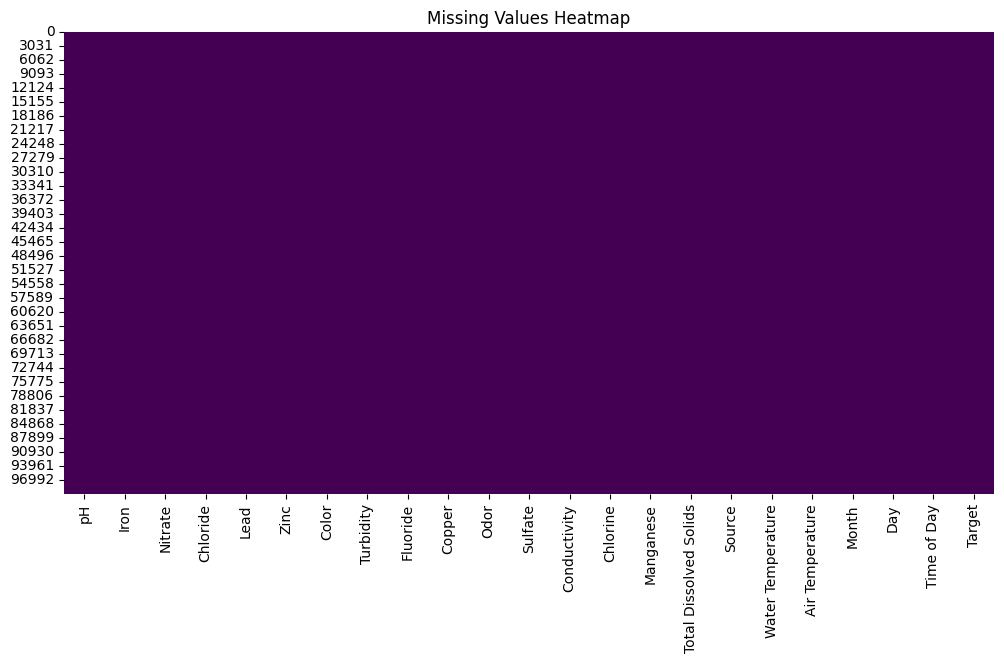

Missing Values Count:
 Series([], dtype: int64)


In [23]:
# Detect missing values
missing_values = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Display missing values count
missing_values = missing_values[missing_values > 0]
print("Missing Values Count:\n", missing_values)

## Step 2: Convert Categorical Data into Numerical Format

1. **Identify Categorical Features:**
   - Features like `Color`, `Odor`, and `Source` are categorical.



2. **Encode Categorical Features:**
   - Use one-hot encoding for nominal categorical features (e.g., `Color`, `Odor`, `Source`).
   - Use label encoding for ordinal categorical features, if any.

In [24]:
# Identify numerical and categorical features dynamically
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude the target and non-feature columns if present
non_feature_cols = ['Target', 'Month', 'Day', 'Time of Day']
numerical_features = [col for col in numerical_features if col not in non_feature_cols]
categorical_features = [col for col in categorical_features if col not in non_feature_cols]

# Visualize initial dataframe
print("Initial DataFrame:")
df

Initial DataFrame:


pH          Iron    Nitrate    Chloride           Lead      Zinc  \
0      7.262136  2.857248e-03   5.965704  245.101184   6.679537e-44  0.702867   
1      6.827967  3.555528e-04   8.650092  261.948686  2.751868e-159  0.205934   
2      7.450048  6.303493e-05   6.154743  176.192348   1.759505e-03  0.896104   
3      7.782600  5.172140e-02   3.747001  224.053938  1.513023e-136  0.088500   
4      7.627800  1.721911e-04   7.988966   89.478315   3.450032e-76  0.402281   
...         ...           ...        ...         ...            ...       ...   
99995  6.878051  4.117124e-07   5.322810  108.110638  8.696207e-159  3.182844   
99996  6.234022  1.117469e-01  17.328060  419.511947  3.996521e-146  0.279021   
99997  7.861995  3.820164e-05   4.304552  215.233572  2.909526e-124  0.009500   
99998  7.865141  4.720492e-02   1.782478  192.690548  8.000041e-221  0.303846   
99999  8.590040  3.168677e-04   4.373577  196.374090   2.664295e-03  0.483866   

                Color  Turbidity  Fluoride    Copper  ...  Chlorine  \
0        Faint Yellow   0.014223  0.583591  0.039819  ...  2.835370   
1           Colorless   0.339881  2.214786  0.224705  ...  3.228036   
2      Near Colorless   0.122076  1.566183  0.058934  ...  2.863932   
3           Colorless   0.209460  0.693032  0.393710  ...  4.195383   
4           Colorless   0.520102  1.130603  0.211742  ...  4.004640   
...               ...        ...       ...       ...  ...       ...   
99995       Colorless   0.278222  1.282346  0.759200  ...  3.844900   
99996          Yellow   0.152766  1.119400  1.501363  ...  2.896578   
99997  Near Colorless   0.027866  0.093040  0.277302  ...  2.131950   
99998       Colorless   0.004299  0.423846  0.538210  ...  3.251744   
99999  Near Colorless   1.262112  0.943935  0.272855  ...  3.838088   

          Manganese  Total Dissolved Solids     Source  Water Temperature  \
0      8.067879e-03              153.126744     Spring          11.179752   
1      4.245956e-05              260.391845     Ground          12.573723   
2      1.646600e-03              131.984171  Reservoir          12.702576   
3      5.283502e-11              447.051626    Unknown          13.009862   
4      9.799640e-03              395.187898     Ground          17.727374   
...             ...                     ...        ...                ...   
99995  3.612888e-03              490.345588       Lake           9.796617   
99996  3.589283e-03              355.272379       Well          15.855275   
99997  1.754100e-03              337.180755      River          37.648185   
99998  1.972004e-02              307.239395     Stream           7.719304   
99999  2.872968e-01              164.660271  Reservoir          12.657137   

       Air Temperature     Month   Day  Time of Day Target  
0            55.340114    August  20.0         17.0      0  
1            80.335206      June  26.0          2.0      1  
2            81.535521   January   4.0         16.0      0  
3            72.845282       May  13.0          1.0      0  
4            36.844691  December  25.0         18.0      0  
...                ...       ...   ...          ...    ...  
99995        38.218949       May  21.0          7.0      0  
99996        63.903902     March  18.0         12.0      0  
99997        72.763230       May  15.0         12.0      0  
99998        46.404757  December  22.0         17.0      0  
99999        63.647430  November  12.0         19.0      1  

[100000 rows x 23 columns]

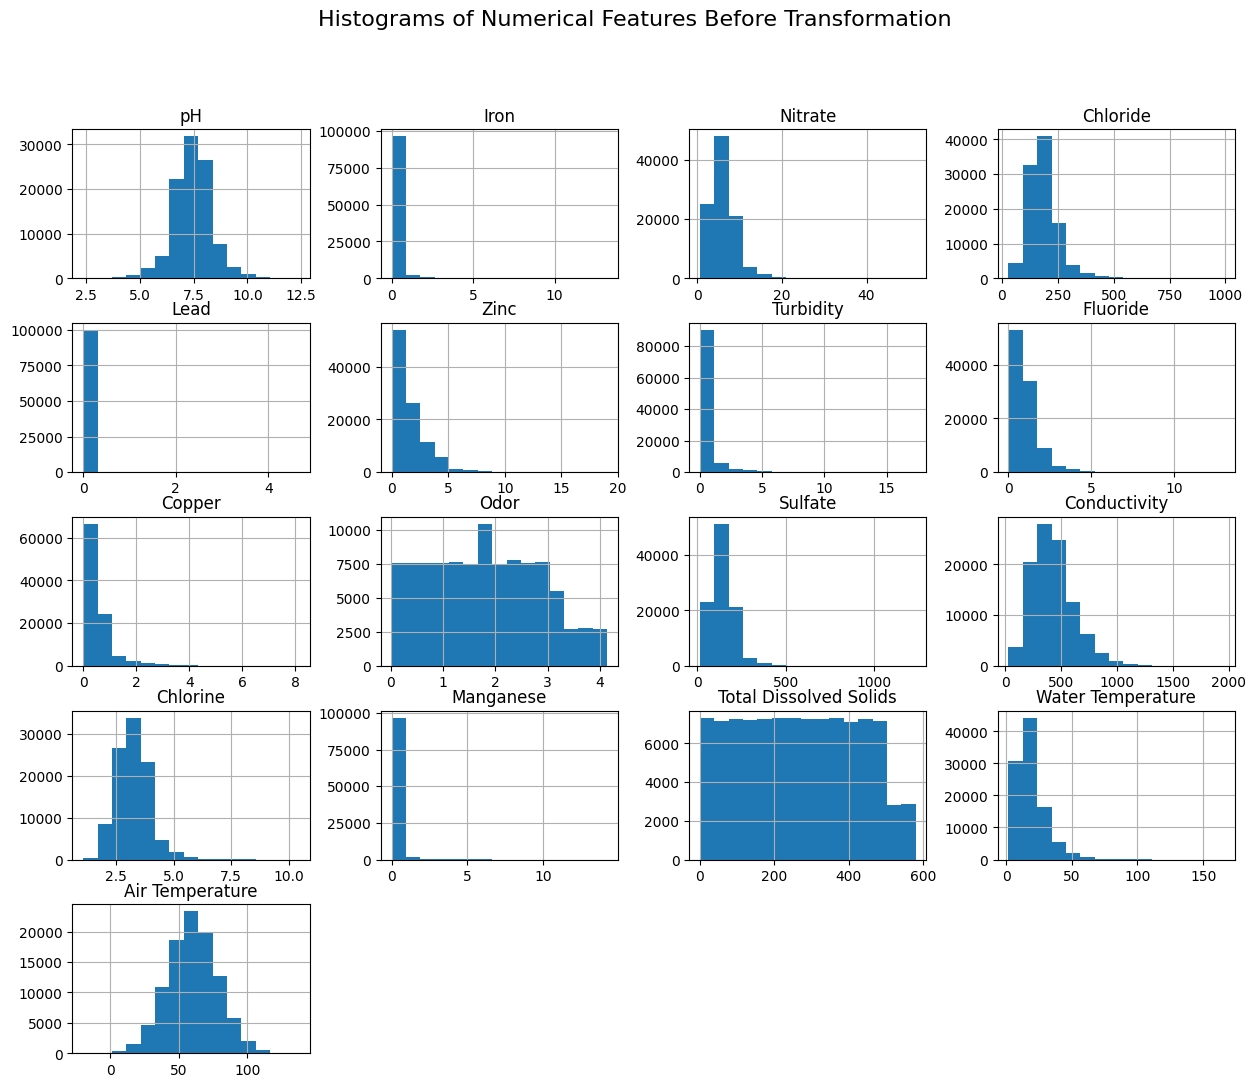

In [33]:
df[numerical_features].hist(figsize=(15, 12), bins=15)
plt.suptitle('Histograms of Numerical Features Before Transformation', fontsize=16)
plt.show()

## Step 3: Normalize or Standardize Numerical Features

1. **Identify Numerical Features:**
   - Features like `pH`, `Iron`, `Nitrate`, `Chloride`, etc., are numerical.

2. **Normalize or Standardize:**
   - Normalize the features using Min-Max scaling or Standardize the features to have a mean of 0 and a standard deviation of 1.

In [25]:
# Step 2: Normalize or Standardize Numerical Features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', MinMaxScaler())  # Normalize using Min-Max scaling
])

In [26]:
# Step 3: Convert Categorical Data into Numerical Format
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])


In [27]:

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [28]:
# Apply the transformations to the dataframe
df_preprocessed = preprocessor.fit_transform(df)

# Debug: Check the shape of the transformed data
print(f"Shape of transformed data: {df_preprocessed.shape}")


Shape of transformed data: (100000, 32)


In [29]:
type(df_preprocessed)

numpy.ndarray

In [30]:
print("Transformed data:")
print(df_preprocessed)

Transformed data:
[[4.88953494e-01 2.16005300e-04 1.05400640e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.45703997e-01 2.68794561e-05 1.58009074e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.07672262e-01 4.76538207e-06 1.09105410e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.48708137e-01 2.88800859e-06 7.28455008e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.49021548e-01 3.56864754e-03 2.34180927e-02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.21231905e-01 2.39549056e-05 7.41982481e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [31]:
# Get feature names after preprocessing
num_features = numerical_features
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features = num_features + list(cat_features)

# Debug: Check the feature names
print(f"Number of feature names: {len(all_features)}")
print(f"Feature names: {all_features}")

Number of feature names: 32
Feature names: ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Color_Colorless', 'Color_Faint Yellow', 'Color_Light Yellow', 'Color_Near Colorless', 'Color_Unknown', 'Color_Yellow', 'Source_Aquifer', 'Source_Ground', 'Source_Lake', 'Source_Reservoir', 'Source_River', 'Source_Spring', 'Source_Stream', 'Source_Unknown', 'Source_Well']


In [32]:
# Convert to DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed, columns=all_features)

# Add back non-transformed columns (if any)
df_preprocessed[non_feature_cols] = df[non_feature_cols].reset_index(drop=True)

df_preprocessed

pH          Iron   Nitrate  Chloride           Lead      Zinc  \
0      0.488953  2.160053e-04  0.105401  0.223622   1.434368e-44  0.036896   
1      0.445704  2.687946e-05  0.158009  0.241089  5.909379e-160  0.010810   
2      0.507672  4.765382e-06  0.109105  0.152178   3.778372e-04  0.047040   
3      0.540799  3.910089e-03  0.061919  0.201800  3.249075e-137  0.004646   
4      0.525379  1.301748e-05  0.145052  0.062274   7.408619e-77  0.021117   
...         ...           ...       ...       ...            ...       ...   
99995  0.450693  3.112507e-08  0.092801  0.081592  1.867429e-159  0.167080   
99996  0.386538  8.447961e-03  0.328079  0.404448  8.582154e-147  0.014647   
99997  0.548708  2.888009e-06  0.072846  0.192656  6.247933e-125  0.000499   
99998  0.549022  3.568648e-03  0.023418  0.169283  1.717934e-221  0.015950   
99999  0.621232  2.395491e-05  0.074198  0.173102   5.721323e-04  0.025400   

       Turbidity  Fluoride    Copper      Odor  ...  Source_Reservoir  \
0       0.000820  0.044927  0.004896  0.511224  ...               0.0   
1       0.019606  0.170519  0.027628  0.140528  ...               0.0   
2       0.007042  0.120580  0.007246  0.082469  ...               1.0   
3       0.012082  0.053353  0.048407  0.629020  ...               0.0   
4       0.030001  0.087044  0.026034  0.325154  ...               0.0   
...          ...       ...       ...       ...  ...               ...   
99995   0.016049  0.098727  0.093344  0.004723  ...               0.0   
99996   0.008812  0.086181  0.184594  0.601761  ...               0.0   
99997   0.001607  0.007158  0.034094  0.754377  ...               0.0   
99998   0.000248  0.032628  0.066173  0.558425  ...               0.0   
99999   0.072803  0.072671  0.033548  0.510144  ...               1.0   

       Source_River  Source_Spring  Source_Stream  Source_Unknown  \
0               0.0            1.0            0.0             0.0   
1               0.0            0.0            0.0             0.0   
2               0.0            0.0            0.0             0.0   
3               0.0            0.0            0.0             1.0   
4               0.0            0.0            0.0             0.0   
...             ...            ...            ...             ...   
99995           0.0            0.0            0.0             0.0   
99996           0.0            0.0            0.0             0.0   
99997           1.0            0.0            0.0             0.0   
99998           0.0            0.0            1.0             0.0   
99999           0.0            0.0            0.0             0.0   

       Source_Well  Target     Month   Day  Time of Day  
0              0.0       0    August  20.0         17.0  
1              0.0       1      June  26.0          2.0  
2              0.0       0   January   4.0         16.0  
3              0.0       0       May  13.0          1.0  
4              0.0       0  December  25.0         18.0  
...            ...     ...       ...   ...          ...  
99995          0.0       0       May  21.0          7.0  
99996          1.0       0     March  18.0         12.0  
99997          0.0       0       May  15.0         12.0  
99998          0.0       0  December  22.0         17.0  
99999          0.0       1  November  12.0         19.0  

[100000 rows x 36 columns]

In [41]:
# Show the preprocessed dataframe
print("\nPreprocessed DataFrame:")
df_preprocessed.head()


Preprocessed DataFrame:


pH      Iron   Nitrate  Chloride           Lead      Zinc  Turbidity  \
0  0.488953  0.000216  0.105401  0.223622   1.434368e-44  0.036896   0.000820   
1  0.445704  0.000027  0.158009  0.241089  5.909379e-160  0.010810   0.019606   
2  0.507672  0.000005  0.109105  0.152178   3.778372e-04  0.047040   0.007042   
3  0.540799  0.003910  0.061919  0.201800  3.249075e-137  0.004646   0.012082   
4  0.525379  0.000013  0.145052  0.062274   7.408619e-77  0.021117   0.030001   

   Fluoride    Copper      Odor  ...  Source_Lake  Source_Reservoir  \
0  0.044927  0.004896  0.511224  ...          0.0               0.0   
1  0.170519  0.027628  0.140528  ...          0.0               0.0   
2  0.120580  0.007246  0.082469  ...          0.0               1.0   
3  0.053353  0.048407  0.629020  ...          0.0               0.0   
4  0.087044  0.026034  0.325154  ...          0.0               0.0   

   Source_River  Source_Spring  Source_Stream  Source_Well  Target     Month  \
0           0.0            1.0            0.0          0.0       0    August   
1           0.0            0.0            0.0          0.0       1      June   
2           0.0            0.0            0.0          0.0       0   January   
3           0.0            0.0            0.0          0.0       0       May   
4           0.0            0.0            0.0          0.0       0  December   

    Day  Time of Day  
0  20.0         17.0  
1  26.0          2.0  
2   4.0         16.0  
3  13.0          1.0  
4  25.0         18.0  

[5 rows x 34 columns]

## Explanation:
1. SimpleImputer is used to handle missing values.
2. OneHotEncoder is used for encoding categorical variables.
3. MinMaxScaler is used to normalize numerical features.
4. ColumnTransformer is used to apply different preprocessing steps to different columns.

Ensure to replace 'your_data.csv' with the actual file path of your dataset. The preprocessed data will be saved in a new file called cleaned_data.csv. This cleaned and preprocessed data is now ready for further analysis or modeling.


# **Task 2. Exploratory Data Analysis (EDA)**

## Exploratory Data Analysis (EDA)

## Step 1: Generate Summary Statistics for Each Feature

1. **Summary Statistics:**
   - Use descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset’s distribution for each feature.

In [42]:
# Write your code
df.describe()

pH          Iron        Nitrate       Chloride  \
count  100000.000000  1.000000e+05  100000.000000  100000.000000   
mean        7.450048  1.275435e-01       6.154743     184.254852   
std         0.882462  4.727115e-01       3.206948      67.289511   
min         2.353677  9.298435e-39       0.587550      29.413497   
25%         6.909558  1.023442e-05       3.981788     139.451761   
50%         7.450048  2.398468e-03       5.658650     178.070121   
75%         8.005500  5.790651e-02       7.605373     216.682713   
max        12.392381  1.322768e+01      51.613366     993.933248   

                Lead          Zinc     Turbidity       Fluoride        Copper  \
count   1.000000e+05  1.000000e+05  1.000000e+05  100000.000000  1.000000e+05   
mean    1.759505e-03  1.553338e+00  5.151431e-01       0.963694  5.157433e-01   
std     3.743585e-02  1.526771e+00  9.067209e-01       0.805483  5.819135e-01   
min     0.000000e+00  1.270699e-07  3.119116e-13       0.000072  5.313946e-07   
25%    9.097472e-122  4.311670e-01  3.929532e-02       0.389784  1.362468e-01   
50%     6.742436e-62  1.127929e+00  2.128546e-01       0.809573  3.665334e-01   
75%     1.126872e-26  2.194826e+00  6.173540e-01       1.315343  6.848318e-01   
max     4.656781e+00  1.904981e+01  1.733592e+01      12.988166  8.133315e+00   

                Odor        Sulfate   Conductivity       Chlorine  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        1.806235     146.012257     425.602265       3.251744   
std         1.053722      67.160950     187.803943       0.727925   
min         0.011100      14.762419      28.615895       1.085141   
25%         0.920603      99.279457     289.628388       2.746157   
50%         1.806235     137.300637     404.437862       3.216300   
75%         2.631970     179.749124     528.488110       3.697811   
max         4.141967    1236.343971    1958.124307      10.425895   

          Manganese  Total Dissolved Solids  Water Temperature  \
count  1.000000e+05           100000.000000      100000.000000   
mean   1.067892e-01              267.386161          19.161161   
std    4.626697e-01              155.942147          11.220968   
min    5.156055e-39                0.013253           1.692632   
25%    2.775842e-06              132.946807          11.500582   
50%    7.380648e-04              266.138246          16.788985   
75%    1.884758e-02              398.757835          23.635863   
max    1.421583e+01              579.793550         165.919987   

       Air Temperature            Day    Time of Day         Target  
count    100000.000000  100000.000000  100000.000000  100000.000000  
mean         60.019117      15.723321      11.513461       0.303060  
std          18.064183       8.726178       6.853685       0.459583  
min         -19.940412       1.000000       0.000000       0.000000  
25%          47.917489       8.000000       6.000000       0.000000  
50%          60.019117      15.723321      11.513461       0.000000  
75%          72.070379      23.000000      17.000000       1.000000  
max         137.532364      31.000000      23.000000       1.000000

## Step 2: Visualize Data Distributions and Relationships Between Variables

1. **Histograms:**
   - Visualize the distribution of numerical features.

2. **Box Plots:**
   - Identify outliers and understand the distribution of numerical features.

3. **Scatter Plots:**
   - Examine relationships between pairs of numerical features.

4. **Line Plots:**
   - Examine trends in numerical features.

5. **Correlation Matrix and Heatmap:**
   - Show the correlation between numerical features.

6. **Count Plots:**
   - Visualize the frequency of categorical features.

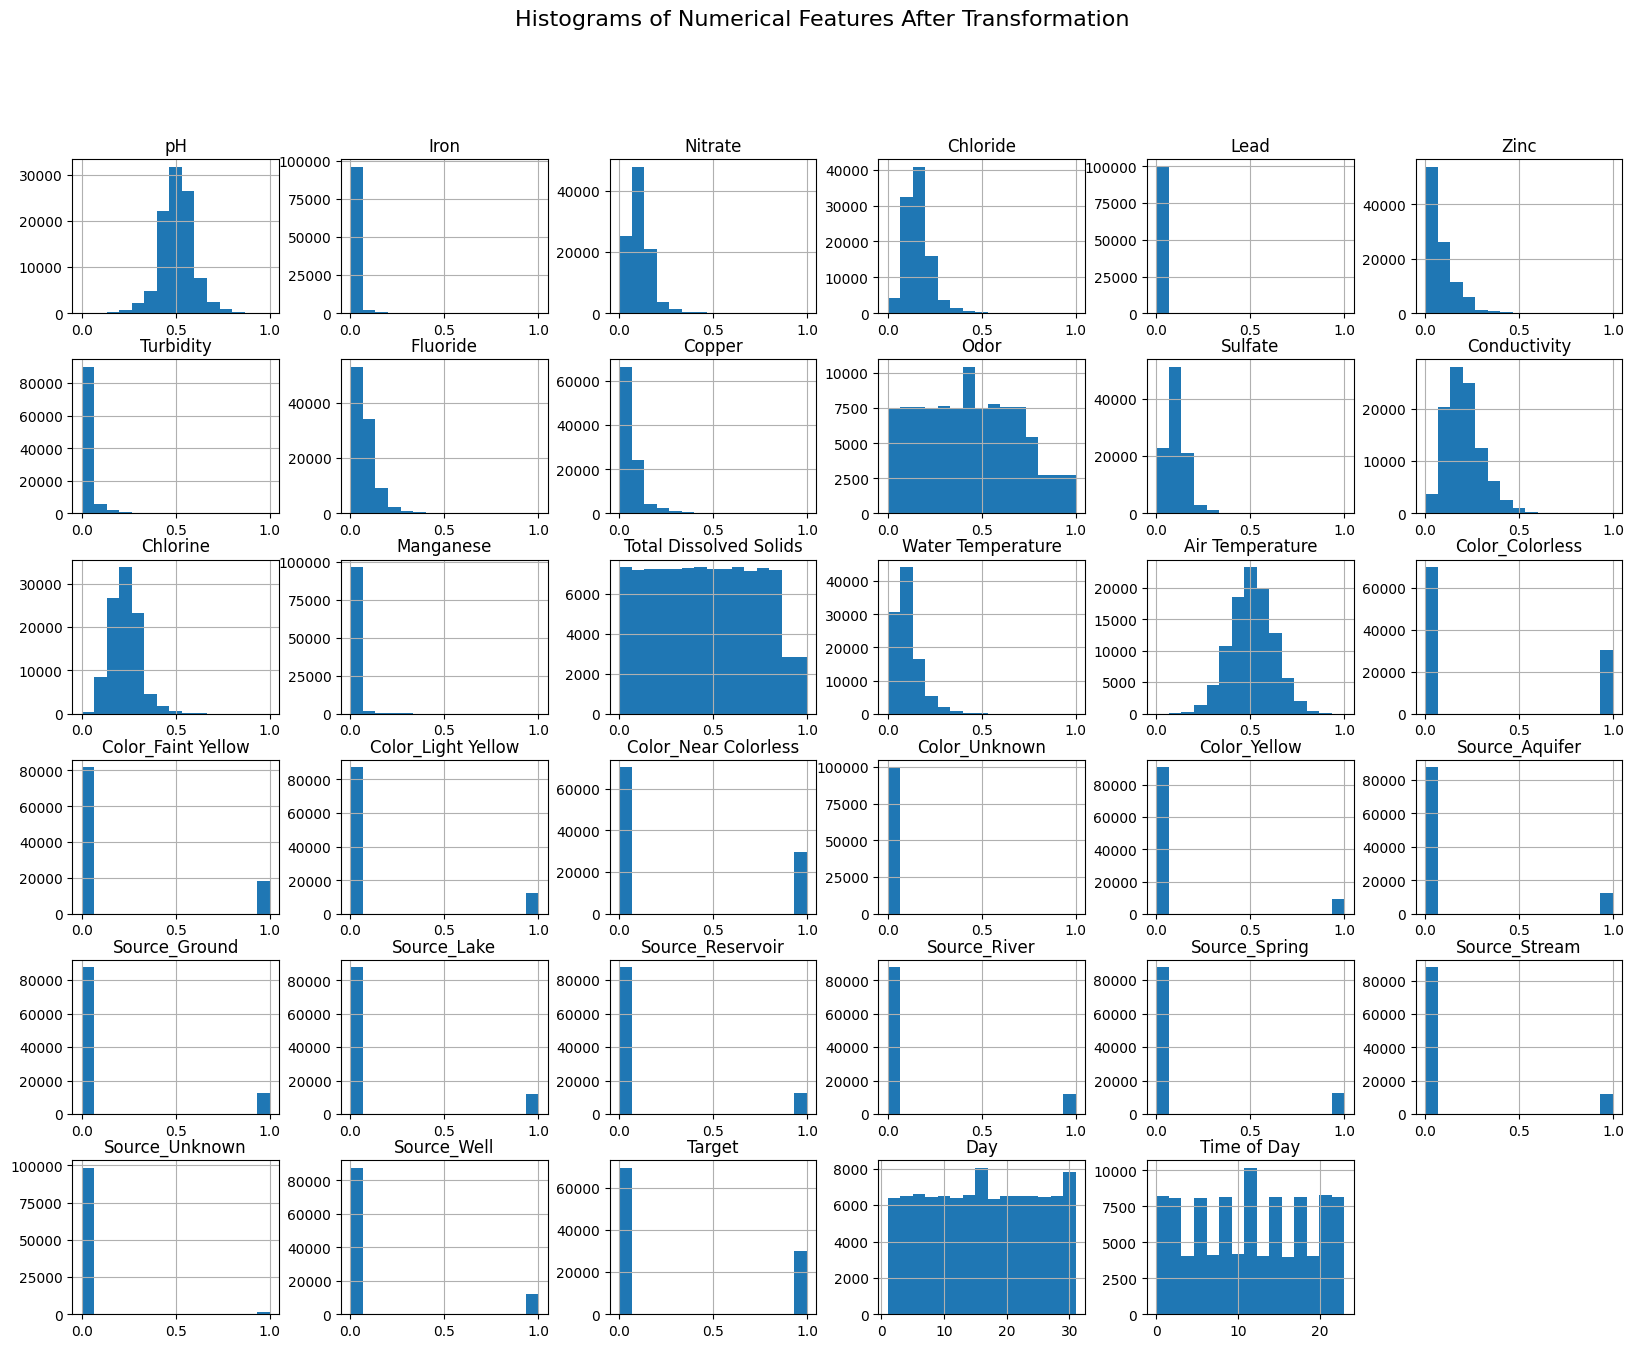

In [33]:
# Select only numerical columns for correlation matrix
numerical_columns_for_corr = df_preprocessed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualize distributions of numerical features after transformation
df_preprocessed[numerical_columns_for_corr].hist(figsize=(20, 15), bins=15,)
plt.suptitle('Histograms of Numerical Features After Transformation', fontsize=16)
plt.show()


Boxplots of Numerical Features:


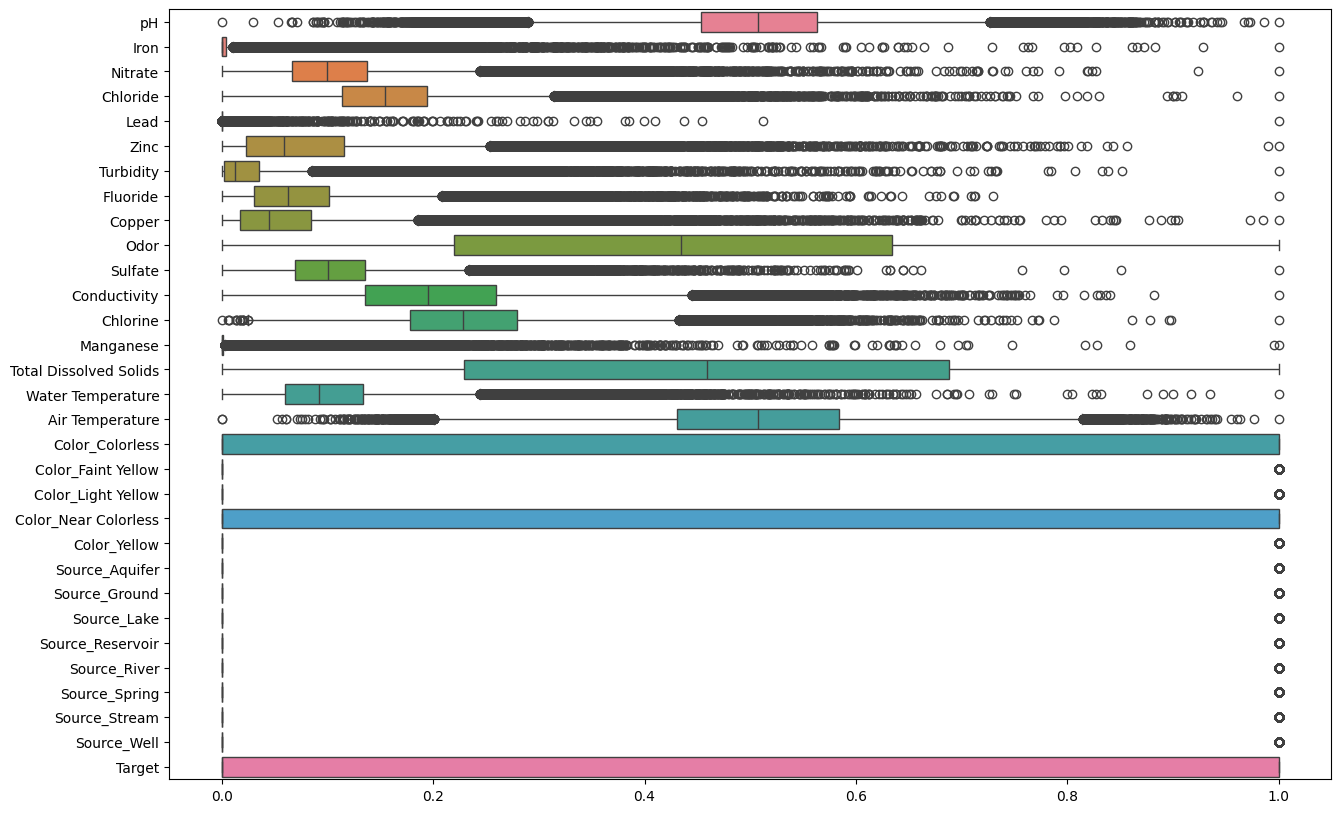

In [44]:
print("\nBoxplots of Numerical Features:")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_preprocessed.drop(['Time of Day', 'Day'], axis=1), orient='h')
plt.show()


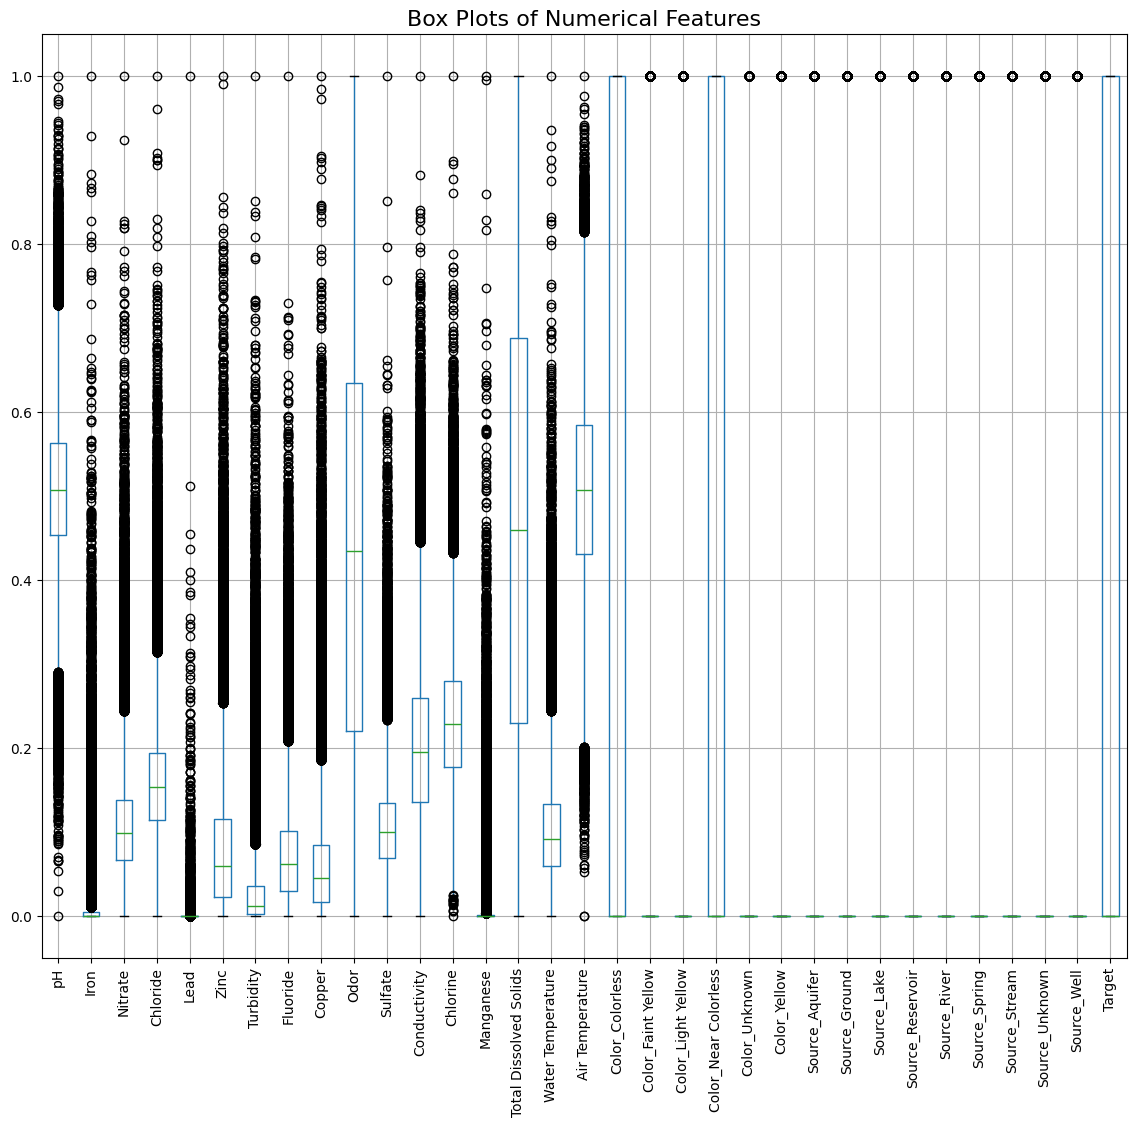

In [34]:
plt.figure(figsize=(14, 12))
df_preprocessed.drop(['Time of Day', 'Day'], axis=1).boxplot()
plt.title('Box Plots of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.show()

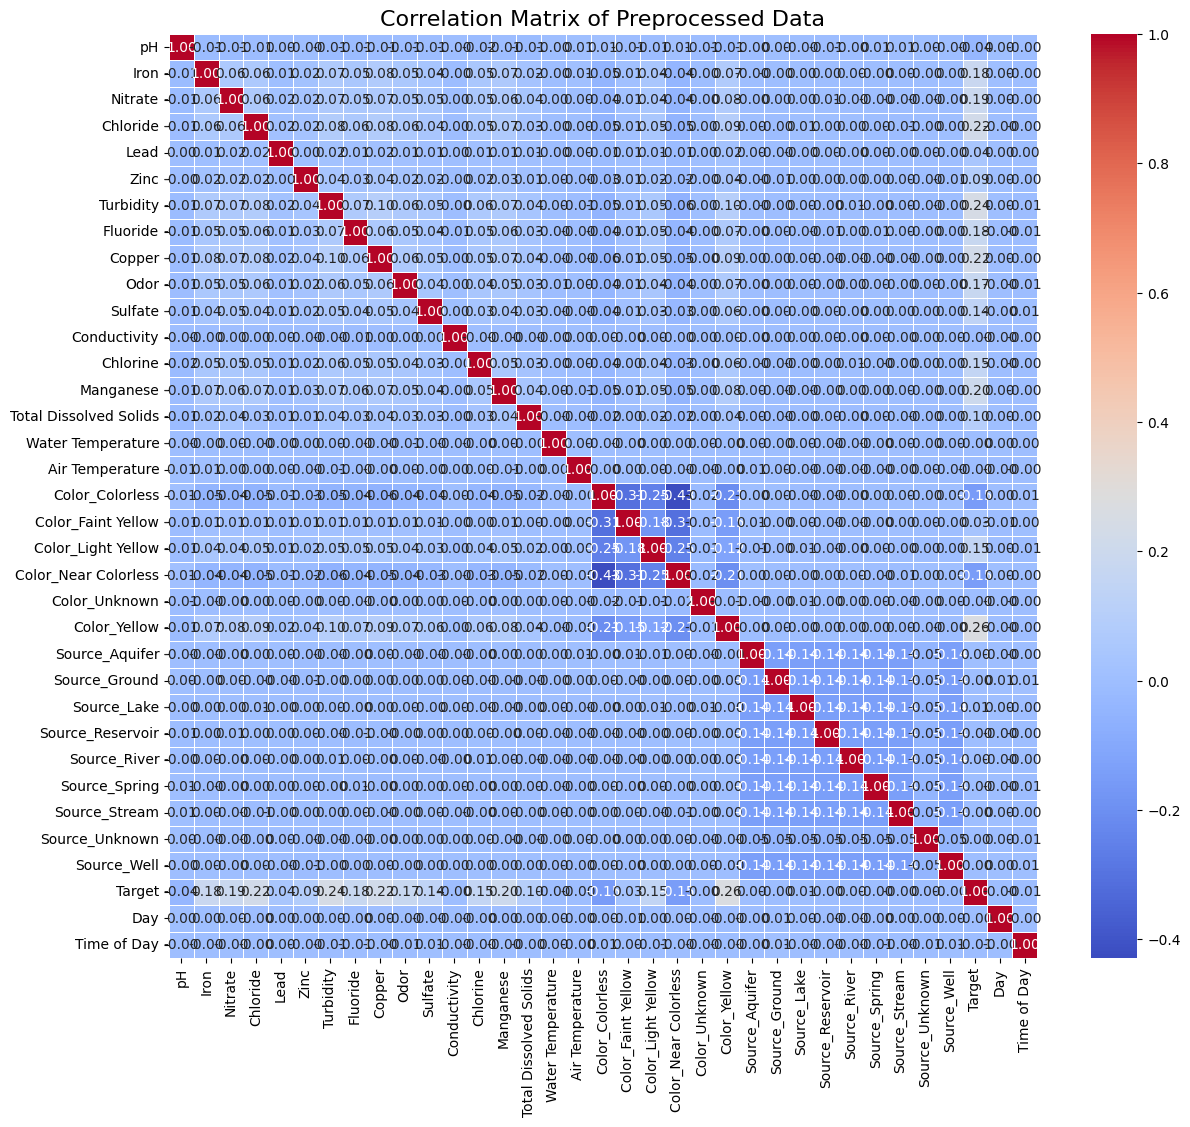

In [35]:
# Visualize correlations in the preprocessed data
plt.figure(figsize=(14, 12))
correlation_matrix = df_preprocessed[numerical_columns_for_corr].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Preprocessed Data', fontsize=16)
plt.show()


In [36]:
threshold = 0.1
significant_correlations = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1.0)].dropna(how='all').dropna(axis=1, how='all')

# Show significant correlations
print("\nSignificant Correlations:")
significant_correlations


Significant Correlations:


Iron   Nitrate  Chloride  Turbidity  Fluoride  \
Iron                         NaN       NaN       NaN        NaN       NaN   
Nitrate                      NaN       NaN       NaN        NaN       NaN   
Chloride                     NaN       NaN       NaN        NaN       NaN   
Turbidity                    NaN       NaN       NaN        NaN       NaN   
Fluoride                     NaN       NaN       NaN        NaN       NaN   
Copper                       NaN       NaN       NaN   0.100243       NaN   
Odor                         NaN       NaN       NaN        NaN       NaN   
Sulfate                      NaN       NaN       NaN        NaN       NaN   
Chlorine                     NaN       NaN       NaN        NaN       NaN   
Manganese                    NaN       NaN       NaN        NaN       NaN   
Total Dissolved Solids       NaN       NaN       NaN        NaN       NaN   
Color_Light Yellow           NaN       NaN       NaN        NaN       NaN   
Color_Yellow                 NaN       NaN       NaN        NaN       NaN   
Target                  0.181133  0.189481  0.220442   0.244591  0.177509   

                          Copper      Odor  Sulfate  Chlorine  Manganese  \
Iron                         NaN       NaN      NaN       NaN        NaN   
Nitrate                      NaN       NaN      NaN       NaN        NaN   
Chloride                     NaN       NaN      NaN       NaN        NaN   
Turbidity               0.100243       NaN      NaN       NaN        NaN   
Fluoride                     NaN       NaN      NaN       NaN        NaN   
Copper                       NaN       NaN      NaN       NaN        NaN   
Odor                         NaN       NaN      NaN       NaN        NaN   
Sulfate                      NaN       NaN      NaN       NaN        NaN   
Chlorine                     NaN       NaN      NaN       NaN        NaN   
Manganese                    NaN       NaN      NaN       NaN        NaN   
Total Dissolved Solids       NaN       NaN      NaN       NaN        NaN   
Color_Light Yellow           NaN       NaN      NaN       NaN        NaN   
Color_Yellow                 NaN       NaN      NaN       NaN        NaN   
Target                  0.222749  0.174051  0.13773  0.154025   0.201674   

                        Total Dissolved Solids  Color_Light Yellow  \
Iron                                       NaN                 NaN   
Nitrate                                    NaN                 NaN   
Chloride                                   NaN                 NaN   
Turbidity                                  NaN                 NaN   
Fluoride                                   NaN                 NaN   
Copper                                     NaN                 NaN   
Odor                                       NaN                 NaN   
Sulfate                                    NaN                 NaN   
Chlorine                                   NaN                 NaN   
Manganese                                  NaN                 NaN   
Total Dissolved Solids                     NaN                 NaN   
Color_Light Yellow                         NaN                 NaN   
Color_Yellow                               NaN                 NaN   
Target                                0.101165            0.150999   

                        Color_Yellow    Target  
Iron                             NaN  0.181133  
Nitrate                          NaN  0.189481  
Chloride                         NaN  0.220442  
Turbidity                        NaN  0.244591  
Fluoride                         NaN  0.177509  
Copper                           NaN  0.222749  
Odor                             NaN  0.174051  
Sulfate                          NaN  0.137730  
Chlorine                         NaN  0.154025  
Manganese                        NaN  0.201674  
Total Dissolved Solids           NaN  0.101165  
Color_Light Yellow               NaN  0.150999  
Color_Yellow                     NaN  0.264

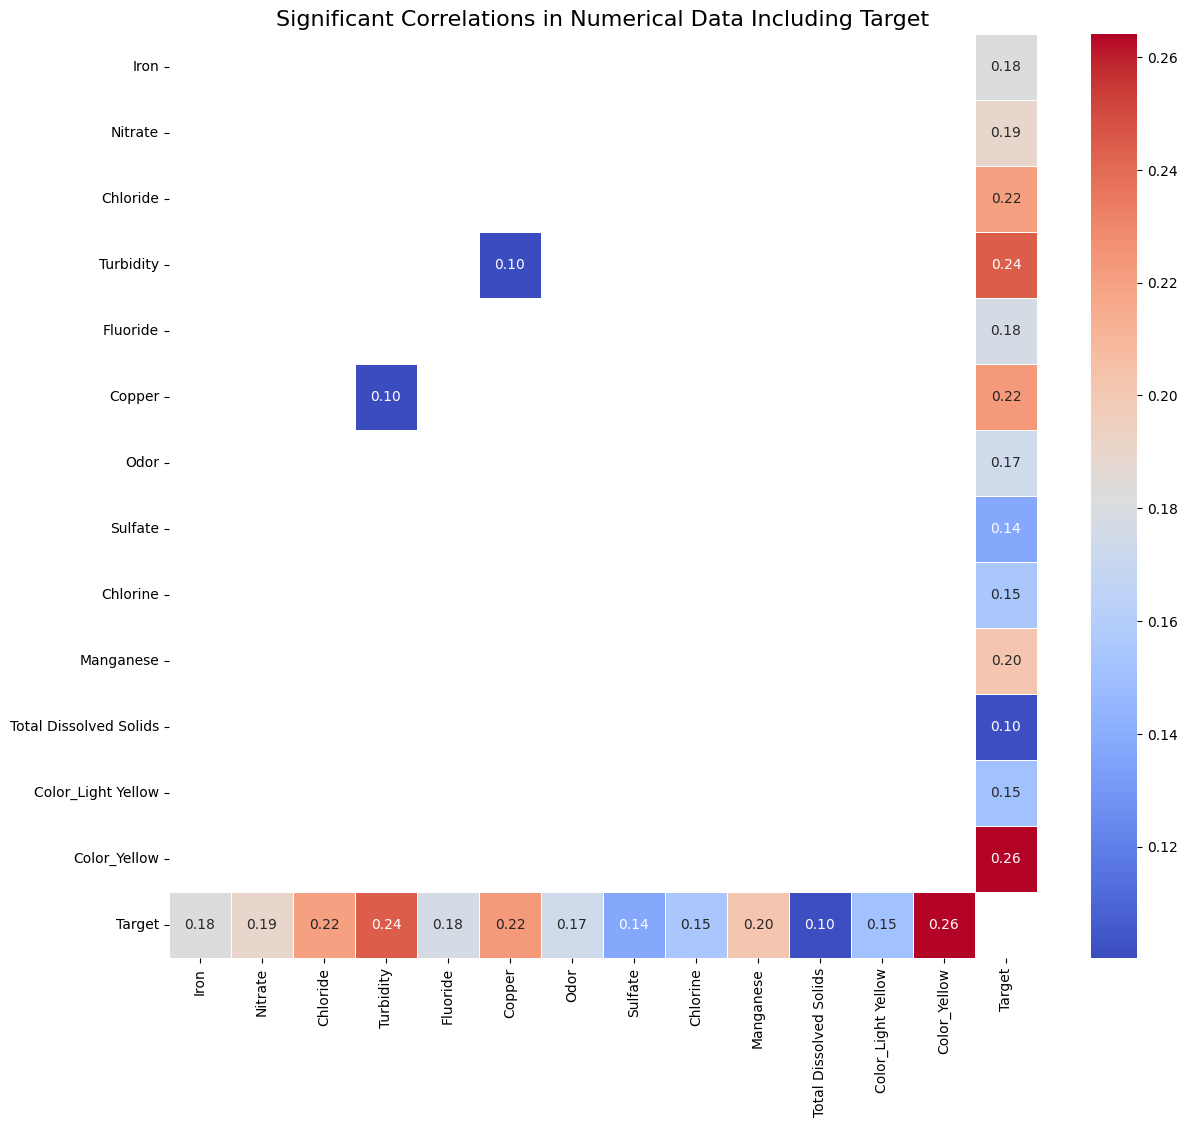

In [37]:

# Visualize significant correlations in the numerical data including the target column
plt.figure(figsize=(14, 12))
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Significant Correlations in Numerical Data Including Target', fontsize=16)
plt.show()

## Step 3: Identify Trends or Anomalies in the Data

1. **Trend Analysis:**
   - Look for patterns or trends over time or other categorical dimensions.

2. **Anomaly Detection:**
   - Identify any anomalies or unusual observations in the dataset.

In [49]:
# write your code

## Explanation:
1. Descriptive Statistics: Use describe() method to generate summary statistics for each feature.
2. Histograms: Use hist() method to visualize the distribution of numerical features.
3. Box Plots: Use boxplot() function to visualize outliers and understand the distribution of numerical features.
4. Scatter Plots: Use pairplot() function from Seaborn to examine relationships between pairs of numerical features.
5. Correlation Matrix and Heatmap: Use corr() method and heatmap() function from Seaborn to visualize the correlation between numerical features.
6. Count Plots: Use countplot() function from Seaborn to visualize the frequency of categorical features.
7. Trend Analysis: Group data by month and plot average water temperature over time to identify trends.
8. Anomaly Detection: Use box plots to identify outliers in numerical features.
9. Ensure to replace 'your_data.csv' with the actual file path of your dataset. These visualizations and analyses will help you understand the distributions, relationships, and potential anomalies in your data.

In [38]:
df_preprocessed.to_csv("data/preprocessed.csv", index = False)


# **Task 3. Feature Engineering** (OPTIONAL - Increase the quality of the dataset)
    


## Step 1: Create New Features

1. **Interaction Terms:**
   - Create new features by multiplying or combining existing features to capture interactions between them.

2. **Aggregate Features:**
   - Create aggregate features such as mean, median, sum, or count of other features.


In [39]:
df = pd.read_csv("data/preprocessed.csv")

In [40]:
df

pH          Iron   Nitrate  Chloride           Lead      Zinc  \
0      0.488953  2.160053e-04  0.105401  0.223622   1.434368e-44  0.036896   
1      0.445704  2.687946e-05  0.158009  0.241089  5.909379e-160  0.010810   
2      0.507672  4.765382e-06  0.109105  0.152178   3.778372e-04  0.047040   
3      0.540799  3.910089e-03  0.061919  0.201800  3.249075e-137  0.004646   
4      0.525379  1.301748e-05  0.145052  0.062274   7.408619e-77  0.021117   
...         ...           ...       ...       ...            ...       ...   
99995  0.450693  3.112507e-08  0.092801  0.081592  1.867429e-159  0.167080   
99996  0.386538  8.447961e-03  0.328079  0.404448  8.582154e-147  0.014647   
99997  0.548708  2.888009e-06  0.072846  0.192656  6.247933e-125  0.000499   
99998  0.549022  3.568648e-03  0.023418  0.169283  1.717934e-221  0.015950   
99999  0.621232  2.395491e-05  0.074198  0.173102   5.721323e-04  0.025400   

       Turbidity  Fluoride    Copper      Odor  ...  Source_Reservoir  \
0       0.000820  0.044927  0.004896  0.511224  ...               0.0   
1       0.019606  0.170519  0.027628  0.140528  ...               0.0   
2       0.007042  0.120580  0.007246  0.082469  ...               1.0   
3       0.012082  0.053353  0.048407  0.629020  ...               0.0   
4       0.030001  0.087044  0.026034  0.325154  ...               0.0   
...          ...       ...       ...       ...  ...               ...   
99995   0.016049  0.098727  0.093344  0.004723  ...               0.0   
99996   0.008812  0.086181  0.184594  0.601761  ...               0.0   
99997   0.001607  0.007158  0.034094  0.754377  ...               0.0   
99998   0.000248  0.032628  0.066173  0.558425  ...               0.0   
99999   0.072803  0.072671  0.033548  0.510144  ...               1.0   

       Source_River  Source_Spring  Source_Stream  Source_Unknown  \
0               0.0            1.0            0.0             0.0   
1               0.0            0.0            0.0             0.0   
2               0.0            0.0            0.0             0.0   
3               0.0            0.0            0.0             1.0   
4               0.0            0.0            0.0             0.0   
...             ...            ...            ...             ...   
99995           0.0            0.0            0.0             0.0   
99996           0.0            0.0            0.0             0.0   
99997           1.0            0.0            0.0             0.0   
99998           0.0            0.0            1.0             0.0   
99999           0.0            0.0            0.0             0.0   

       Source_Well  Target     Month   Day  Time of Day  
0              0.0       0    August  20.0         17.0  
1              0.0       1      June  26.0          2.0  
2              0.0       0   January   4.0         16.0  
3              0.0       0       May  13.0          1.0  
4              0.0       0  December  25.0         18.0  
...            ...     ...       ...   ...          ...  
99995          0.0       0       May  21.0          7.0  
99996          1.0       0     March  18.0         12.0  
99997          0.0       0       May  15.0         12.0  
99998          0.0       0  December  22.0         17.0  
99999          0.0       1  November  12.0         19.0  

[100000 rows x 36 columns]

In [41]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove("Target")
numerical_features

['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Lead',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature',
 'Color_Colorless',
 'Color_Faint Yellow',
 'Color_Light Yellow',
 'Color_Near Colorless',
 'Color_Unknown',
 'Color_Yellow',
 'Source_Aquifer',
 'Source_Ground',
 'Source_Lake',
 'Source_Reservoir',
 'Source_River',
 'Source_Spring',
 'Source_Stream',
 'Source_Unknown',
 'Source_Well',
 'Day',
 'Time of Day']

In [42]:
# write your code

# Step 3: Feature Engineering
# ==============================

# Create new features
df['Water_Temp_to_Air_Temp_Ratio'] = df['Water Temperature'] / (df['Air Temperature'] + 1)
df['Total_Metals'] = df[['Iron', 'Lead', 'Zinc', 'Copper', 'Manganese']].sum(axis=1)

numerical_features.extend(['Water_Temp_to_Air_Temp_Ratio', 'Total_Metals'])


In [43]:
numerical_features

['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Lead',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature',
 'Color_Colorless',
 'Color_Faint Yellow',
 'Color_Light Yellow',
 'Color_Near Colorless',
 'Color_Unknown',
 'Color_Yellow',
 'Source_Aquifer',
 'Source_Ground',
 'Source_Lake',
 'Source_Reservoir',
 'Source_River',
 'Source_Spring',
 'Source_Stream',
 'Source_Unknown',
 'Source_Well',
 'Day',
 'Time of Day',
 'Water_Temp_to_Air_Temp_Ratio',
 'Total_Metals']

In [45]:
categorical_features

['Color', 'Source']

In [46]:
# numerical_features.remove('Day')
# numerical_features.remove('Time of Day')
# print(numerical_features)
# categorical_features.remove('Month')
# categorical_features

In [57]:

# Apply transformations
X = df.drop('Target', axis=1)
y = df['Target']

# X_transformed = preprocessor.fit_transform(X)

# Create a DataFrame from the transformed data
# X_transformed_df = pd.DataFrame(X, columns=numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))


X_transformed_df=X[numerical_features].copy()
print("\nTransformed Features Head:")
X_transformed_df.head()


Transformed Features Head:


pH      Iron   Nitrate  Chloride           Lead      Zinc  Turbidity  \
0  0.488953  0.000216  0.105401  0.223622   1.434368e-44  0.036896   0.000820   
1  0.445704  0.000027  0.158009  0.241089  5.909379e-160  0.010810   0.019606   
2  0.507672  0.000005  0.109105  0.152178   3.778372e-04  0.047040   0.007042   
3  0.540799  0.003910  0.061919  0.201800  3.249075e-137  0.004646   0.012082   
4  0.525379  0.000013  0.145052  0.062274   7.408619e-77  0.021117   0.030001   

   Fluoride    Copper      Odor  ...  Source_Ground  Source_Lake  \
0  0.044927  0.004896  0.511224  ...            0.0          0.0   
1  0.170519  0.027628  0.140528  ...            1.0          0.0   
2  0.120580  0.007246  0.082469  ...            0.0          0.0   
3  0.053353  0.048407  0.629020  ...            0.0          0.0   
4  0.087044  0.026034  0.325154  ...            1.0          0.0   

   Source_Reservoir  Source_River  Source_Spring  Source_Stream  \
0               0.0           0.0            1.0            0.0   
1               0.0           0.0            0.0            0.0   
2               1.0           0.0            0.0            0.0   
3               0.0           0.0            0.0            0.0   
4               0.0           0.0            0.0            0.0   

   Source_Unknown  Source_Well  Water_Temp_to_Air_Temp_Ratio  Total_Metals  
0             0.0          0.0                      0.039084      0.042576  
1             0.0          0.0                      0.040480      0.038468  
2             0.0          0.0                      0.040769      0.054784  
3             1.0          0.0                      0.043362      0.056963  
4             0.0          0.0                      0.071760      0.047854  

[5 rows x 34 columns]

In [58]:
X_transformed_df.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine',
       'Manganese', 'Total Dissolved Solids', 'Water Temperature',
       'Air Temperature', 'Color_Colorless', 'Color_Faint Yellow',
       'Color_Light Yellow', 'Color_Near Colorless', 'Color_Unknown',
       'Color_Yellow', 'Source_Aquifer', 'Source_Ground', 'Source_Lake',
       'Source_Reservoir', 'Source_River', 'Source_Spring', 'Source_Stream',
       'Source_Unknown', 'Source_Well', 'Water_Temp_to_Air_Temp_Ratio',
       'Total_Metals'],
      dtype='object')

In [59]:
X_transformed_df.shape

(100000, 34)


# **Task 4. Model Building**
## Step 1: Split the Data into Training and Testing Sets
   - Use a function to split the dataset into training and testing sets.


In [60]:
# write your code
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)


## Step 2: Train Machine Learning Models to Predict the Target Variable

1. **Train Models:**
   - Train different machine learning models such as Logistic Regression, Random Forest, and Support Vector Machine.

In [61]:
# write your code
model_rf=RandomForestClassifier(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

## Step 3: Evaluate Model Performance Using Appropriate Metrics

1. **Evaluate Models:**
   - Evaluate the performance of the models using metrics like accuracy, precision, recall, and F1-score.

In [62]:
# write your code

y_pred = model_rf.predict(X_test)
    
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results= {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1}

results

{'accuracy': 0.8567,
 'precision': 0.7340455840455841,
 'recall': 0.8376137841352406,
 'f1': 0.7824172487093836}

In [63]:
# create function to get results to avoid repetition
def get_results(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results= {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1}
    return results

In [64]:
get_results(y_test, y_pred)

{'accuracy': 0.8567,
 'precision': 0.7340455840455841,
 'recall': 0.8376137841352406,
 'f1': 0.7824172487093836}

### Compare different models

In [65]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model with progress tracking using tqdm
results = {}
for name, model in tqdm(models.items(), desc="Training and Evaluating Models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = get_results(y_test, y_pred)

Training and Evaluating Models:   0%|          | 0/4 [00:00<?, ?it/s]

Training and Evaluating Models: 100%|██████████| 4/4 [00:57<00:00, 14.29s/it]


In [66]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
results_df



Model Performance Comparison:


accuracy  precision    recall        f1
Logistic Regression   0.79150   0.729292  0.512354  0.601871
Random Forest         0.85670   0.734046  0.837614  0.782417
K-Nearest Neighbors   0.76965   0.716205  0.415962  0.526272
Decision Tree         0.82170   0.715428  0.697984  0.706599

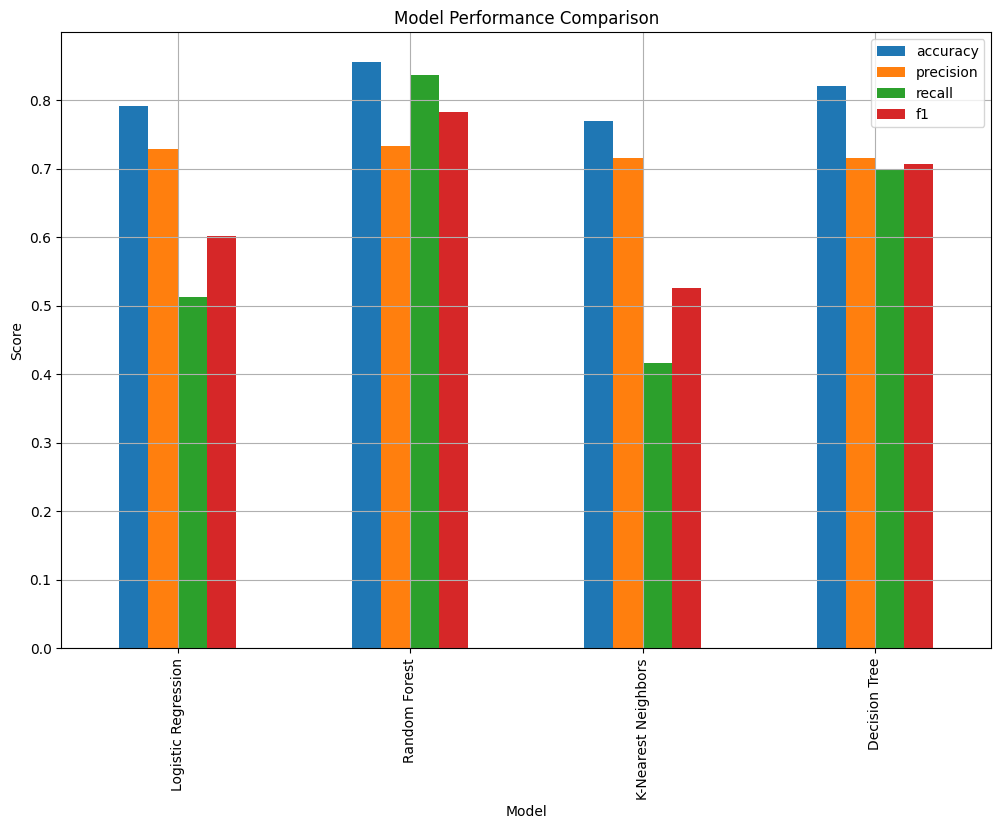

In [68]:

# Plot results for visual comparison
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.grid()
plt.show()


In [69]:

# Choose the best model based on F1-score
best_model_name = results_df['f1'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


In [70]:

# Generate and plot the confusion matrix
def plot_confusion_matrix (model, X_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name} Model")
    plt.show()

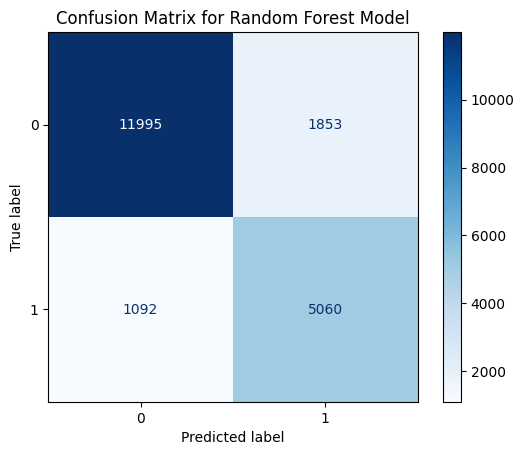

In [68]:
plot_confusion_matrix (model_rf, X_test, 'Random Forest')

# **Task 5. Model Interpretation and Insights**


## Step 1: Interpret the Model to Understand Which Factors Most Influence Water Quality
1. **Feature Importance:**
   - Use the feature importance scores from tree-based models like Random Forest to identify which factors most influence water quality.
   - Use coefficients from Logistic Regression to understand the direction and magnitude of influence.


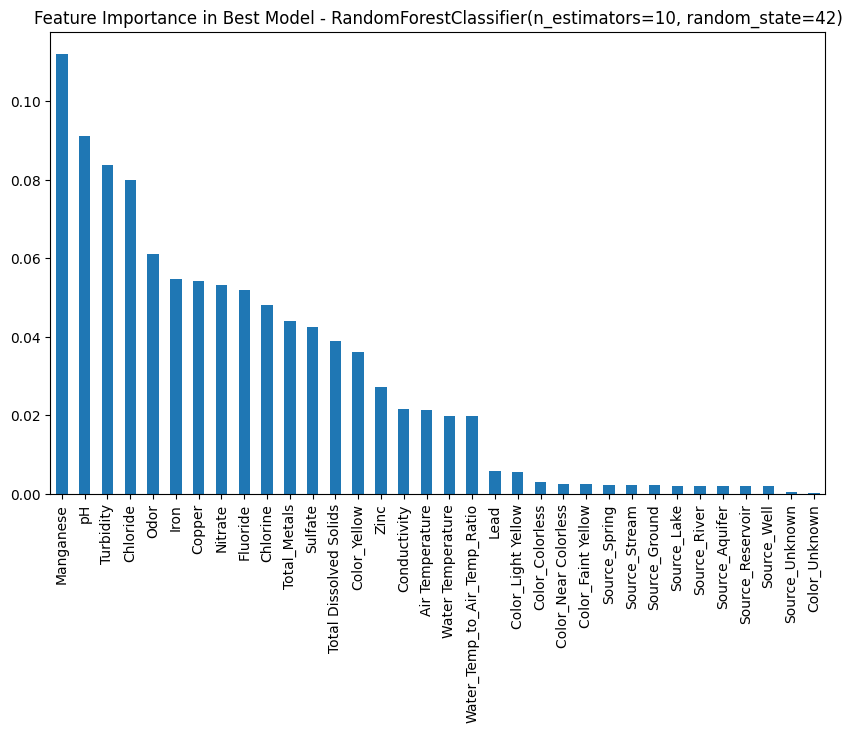


Top 5 important features: Index(['Manganese', 'pH', 'Turbidity', 'Chloride', 'Odor', 'Iron', 'Copper',
       'Nitrate', 'Fluoride', 'Chlorine'],
      dtype='object')


In [72]:

# Step 5: Model Interpretation and Insights
# ==============================

# Interpret the best model to understand which factors most influence water quality
if hasattr(best_model, 'feature_importances_'):
    # feature_importance = pd.Series(best_model.feature_importances_, index=numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))
    feature_importance = pd.Series(best_model.feature_importances_, index=numerical_features )
    feature_importance.sort_values(ascending=False, inplace=True)
    
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title(f'Feature Importance in Best Model - {best_model}')
    plt.show()

important_features = feature_importance.head(10).index if 'feature_importances_' in dir(best_model) else numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
print(f'\nTop 5 important features: {important_features}')

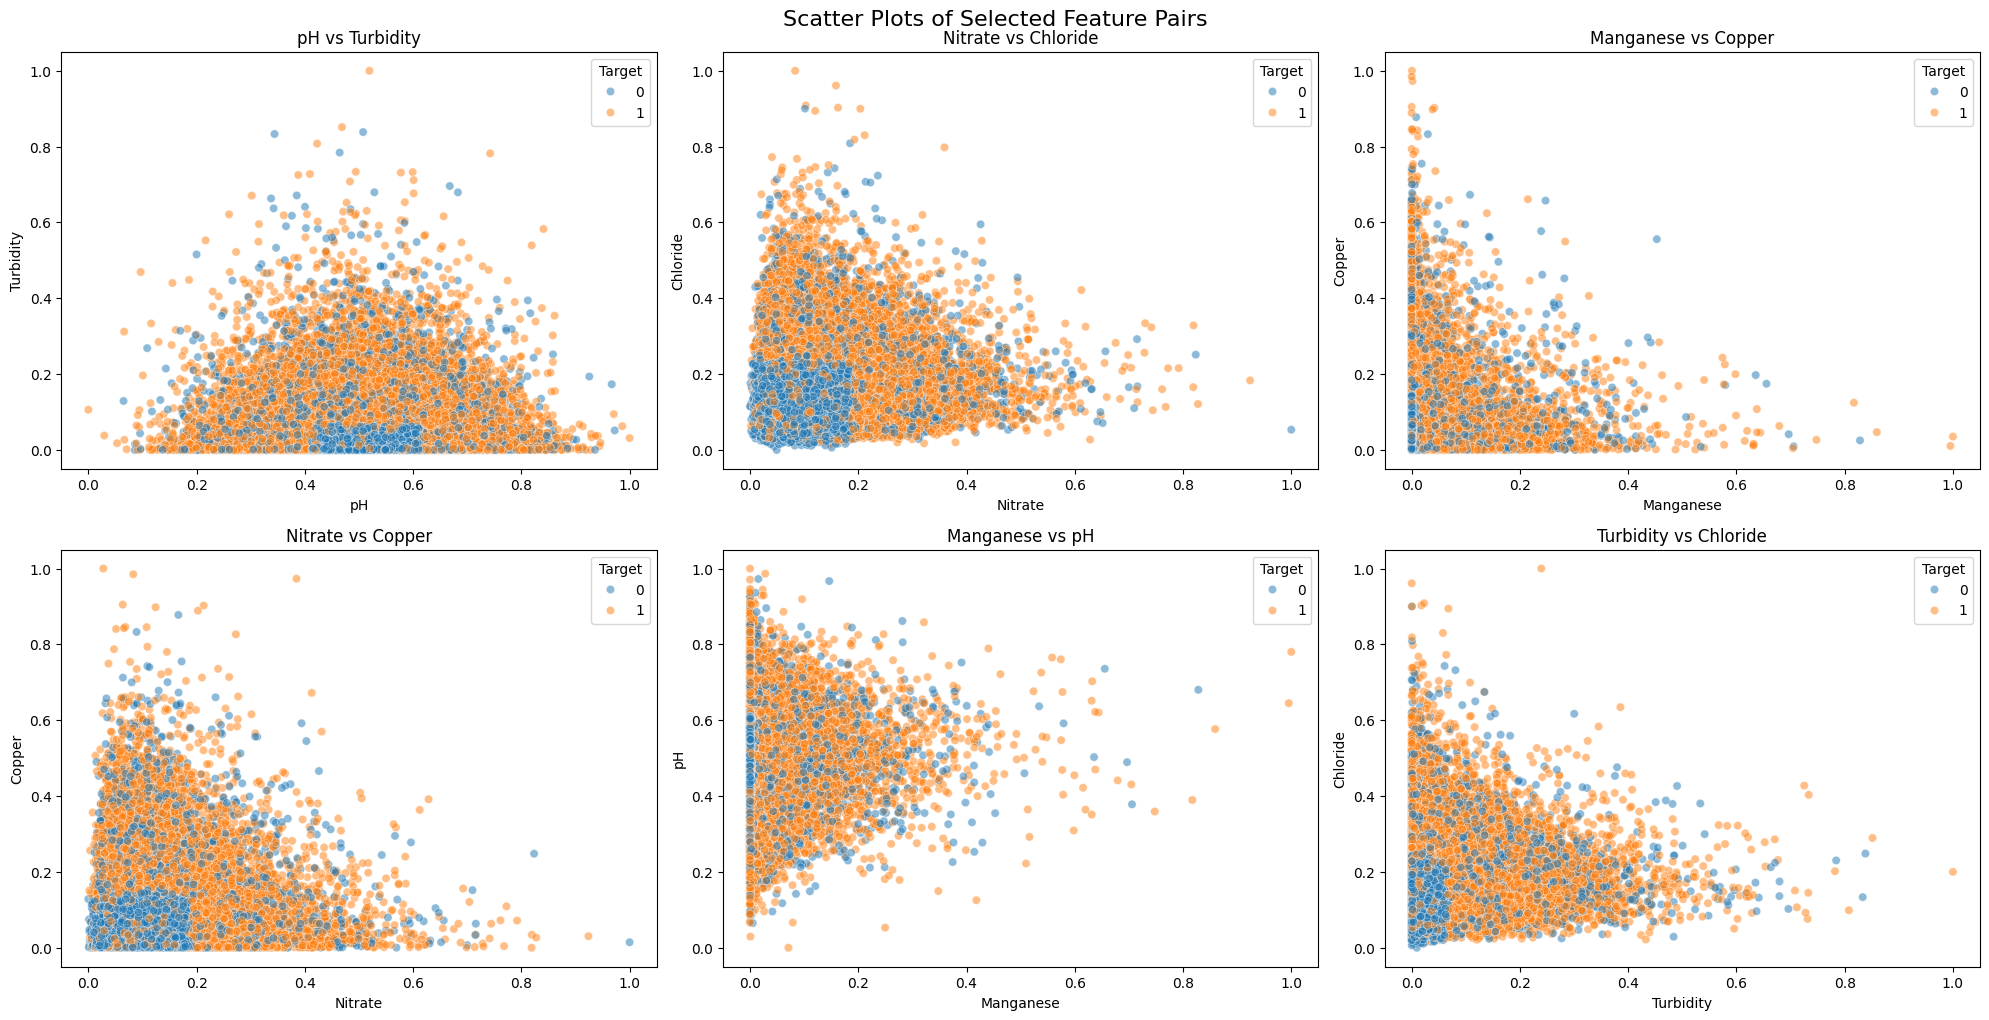

In [69]:
# Plot scatter plots for pairs of numerical features
plt.figure(figsize=(20, 15))

# Example pairs of numerical features
pairs = [('pH', 'Turbidity'), ('Nitrate', 'Chloride'), ('Manganese', 'Copper'), ('Nitrate', 'Copper'), 

         ('Manganese', 'pH'), ('Turbidity', 'Chloride')
         ]

for i, (x_feature, y_feature) in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=x_feature, y=y_feature, data=df, alpha=0.5, hue='Target')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'{x_feature} vs {y_feature}')
    

plt.suptitle('Scatter Plots of Selected Feature Pairs', fontsize=16)
plt.tight_layout()
plt.show()


## Step 2: Provide Actionable Insights Based on Model Findings

1. **Identify Key Factors:**
   - Determine the most important factors influencing water quality based on the model interpretation.

2. **Actionable Insights:**
   - Provide specific recommendations for addressing key factors to improve water quality.

## Step 3: Discuss Potential Interventions or Policy Recommendations to Improve Water Quality

1. **Interventions:**
   - Suggest practical measures that can be taken to address the key factors influencing water quality.

2. **Policy Recommendations:**
   - Propose policy changes or initiatives to support the interventions and improve water quality on a broader scale.


In [70]:
# Provide actionable insights based on model findings
insights = f"""
Based on the best model, the most influential factors for water quality are:
{', '.join(important_features.tolist())}

Policy recommendations:
- Regular monitoring and regulation of `{', '.join(important_features.tolist())}` levels in water sources.
- Implementing measures to reduce industrial and agricultural runoff to control Nitrate and Sulfate levels.
- Public awareness campaigns on the importance of water quality and ways to reduce contamination.
"""
print(insights)


Based on the best model, the most influential factors for water quality are:
pH, Chloride, Manganese, Turbidity, Nitrate, Iron, Odor, Copper, Chlorine, Fluoride

Policy recommendations:
- Regular monitoring and regulation of `pH, Chloride, Manganese, Turbidity, Nitrate, Iron, Odor, Copper, Chlorine, Fluoride` levels in water sources.
- Implementing measures to reduce industrial and agricultural runoff to control Nitrate and Sulfate levels.
- Public awareness campaigns on the importance of water quality and ways to reduce contamination.



# Tune hyperparameter

In [71]:
# Define models and their hyperparameters for grid search
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Train and evaluate each model with hyperparameter tuning
results = {}
for name, mp in tqdm(model_params.items(), desc="Training and Evaluating Models"):
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    results[name] = get_results (y_test, y_pred)


Training and Evaluating Models:   0%|          | 0/2 [00:00<?, ?it/s]

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Training and Evaluating Models:  50%|█████     | 1/2 [01:05<01:05, 65.57s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Training and Evaluating Models:  50%|█████     | 1/2 [12:11<12:11, 731.85s/it]


KeyboardInterrupt: 

In [72]:

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Best Parameters: {metrics['best_params']}")
    for metric_name, metric_value in metrics.items():
        if metric_name != 'best_params':
            print(f"  {metric_name}: {metric_value:.4f}")


Logistic Regression:
  Best Parameters: {'C': 10, 'solver': 'liblinear'}
  accuracy: 0.7922
  precision: 0.7297
  recall: 0.5153
  f1: 0.6040


## XGBoost

In [74]:

xgb = XGBClassifier(random_state=42, eval_metric='logloss') 
xgb.fit(X_train.values, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [75]:
# write your code

y_pred = xgb.predict(X_test.values)
    
get_results (y_test, y_pred)

{'accuracy': 0.856,
 'precision': 0.7366213479895863,
 'recall': 0.8278608582574772,
 'f1': 0.7795805908464718}

In [78]:

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train.values, y_train)

# Get the best estimator
best_xgb = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test.values)
              

# Print the best parameters and the evaluation metrics
print("Best Parameters:", grid_search.best_params_)
results= {
    "Best Parameters": grid_search.best_params_}
get_results (y_test, y_pred)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\temp\virtualenv\python12\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}


{'Best Parameters': {'colsample_bytree': 1.0,
  'learning_rate': 0.1,
  'max_depth': 7,
  'n_estimators': 50,
  'subsample': 0.8},
 'accuracy': 0.86465,
 'precision': 0.7374224672639559,
 'recall': 0.8696358907672301,
 'f1': 0.7980905497128366}

In [76]:
xgb = XGBClassifier(random_state=42, 
                    colsample_bytree= 1.0,
                    learning_rate= 0.1,
                    max_depth= 7,
                    n_estimators= 50,
                    subsample= 0.8, eval_metric='logloss') 
xgb.fit(X_train.values, y_train)
y_pred = xgb.predict(X_test.values)
get_results (y_test, y_pred)

{'accuracy': 0.86485,
 'precision': 0.7380919508490956,
 'recall': 0.8689856957087126,
 'f1': 0.7982082866741321}

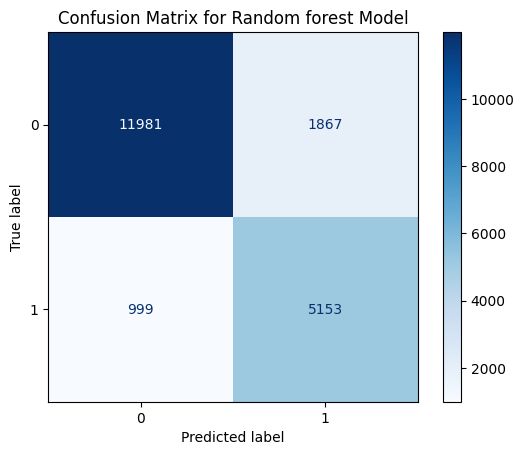

In [78]:
plot_confusion_matrix (model_rf, X_test, 'Random forest')

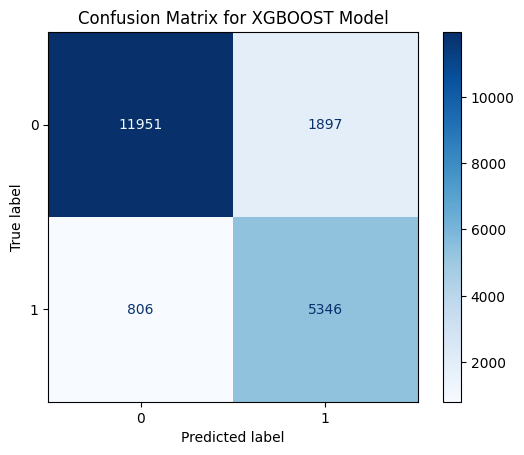

In [77]:

# Generate and plot the confusion matrix
plot_confusion_matrix (xgb, X_test.values, 'XGBOOST')

